# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

### Helper Variables (To reuse in the code)

In [2]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('trip_records/2023-07.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3481547 entries, 0 to 3513648
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
final_df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:

    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df['date'].unique():
            date_data = df[df['date'] == date]
                
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]

                # Sample 1% of the hourly data randomly
                if not hour_data.empty:

                    # Take at least 1 row if very small set
                    n = max(1, int(len(hour_data) * 0.01))
                    sample = hour_data.sample(n=n, random_state=42)

                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        final_df = pd.concat([final_df, sampled_data])

        print(f"Sampled from file: {file_name}")
        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Sampled from file: 2023-01.parquet
Sampled from file: 2023-02.parquet
Sampled from file: 2023-03.parquet
Sampled from file: 2023-04.parquet
Sampled from file: 2023-05.parquet
Sampled from file: 2023-06.parquet
Sampled from file: 2023-07.parquet
Sampled from file: 2023-08.parquet
Sampled from file: 2023-09.parquet
Sampled from file: 2023-10.parquet
Sampled from file: 2023-11.parquet
Sampled from file: 2023-12.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
final_df.to_parquet('Hourly_Sampled_Data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [10]:
# Load the new data file
df = pd.read_parquet("Hourly_Sampled_Data.parquet")

In [11]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
428               256             2  ...      0.5        0.00           0.0   
1113              237             1  ...      0.5        2.58           0.0   
819               141             2  ...      0.5        0.00           0.0   
3192              142             2  ...      0.5        0.00           0.0   
2995263           107             0  ...      0.5        5.93           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
428                        1.0         41.15                   0.0   
1113                       1.0         15.48                   2.5   
819                        1.0         16.40                   2.5   
3192                       1.0         11.50                   2.5   
2995263                    1.0         35.57                   NaN   

         airport_fee        date  hour Airport_fee  
428             1.25  2023-01-01     0         NaN  
1113            0.00  2023-01-01     0         NaN  
819             0.00  2023-01-01     0         NaN  
3192            0.00  2023-01-01     0         NaN  
2995263          NaN  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375186 entries, 428 to 3195759
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               375186 non-null  int64         
 1   tpep_pickup_datetime   375186 non-null  datetime64[us]
 2   tpep_dropoff_datetime  375186 non-null  datetime64[us]
 3   passenger_count        362431 non-null  float64       
 4   trip_distance          375186 non-null  float64       
 5   RatecodeID             362431 non-null  float64       
 6   store_and_fwd_flag     362431 non-null  object        
 7   PULocationID           375186 non-null  int64         
 8   DOLocationID           375186 non-null  int64         
 9   payment_type           375186 non-null  int64         
 10  fare_amount            375186 non-null  float64       
 11  extra                  375186 non-null  float64       
 12  mta_tax                375186 non-null  float6

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed

#- Fixing index
df.reset_index(drop=True, inplace=True)

#- Dropping the "store_and_fwd_flag" column as it won't add meaningful insights to our overall analysis.
df.drop(columns=['store_and_fwd_flag'], inplace=True)

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee        date hour  \
0         41.15                   0.0         1.25  2023-01-01    0   
1         15.48                   2.5         0.00  2023-01-01    0   
2         16.40                   2.5         0.00  2023-01-01    0   
3         11.50                   2.5         0.00  2023-01-01    0   
4         35.57                   NaN          NaN  2023-01-01    0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [14]:
# Combine the two airport fee columns

#- Creating a single unified column using priority logic
df['Airport_fee_combined'] = df[['Airport_fee', 'airport_fee']].bfill(axis=1).iloc[:, 0]

#- Dropping the old duplicate columns
df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)

#- Renaming the combined column back to 'Airport_fee' for consistency
df.rename(columns={'Airport_fee_combined': 'Airport_fee'}, inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [15]:
# check where values of fare amount are negative

#- Listing all monetary columns to check negative values
money_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
              'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

#- Creating a boolean mask for rows where any monetary column is negative
negative_values = df[money_cols].lt(0).any(axis=1)

#- Showing rows with any negative financial values
df_neg = df[negative_values]

#- Print count and preview
print(f"Rows with negative values: {len(df_neg)}")

df_neg


Rows with negative values: 16


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
34007          2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
90103          2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
95770          2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
97382          2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
160046         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
188085         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
205746         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   
218149         2  2023-05-31 14:52:23   2023-05-31 15:54:56              2.0   
243143         2  2023-07-27 17:56:27   2023-07-27 18:00:12              1.0   
304471         2  2023-10-27 14:51:03   2023-10-27 14:51:11              1.0   
312600         2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
316292         2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
319689         2  2023-11-09 18:20:22   2023-11-09 18:26:46              2.0   
335372         2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
352035         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
373310         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
34007            0.00         1.0           231           231             2   
90103            1.09         2.0            90           170             2   
95770            1.38         2.0           249           186             2   
97382            0.01         2.0           237           237             2   
160046           3.61         1.0            68           232             2   
188085           8.35         1.0           132           222             2   
205746           0.00         1.0           193           193             2   
218149          17.37         2.0           132           132             2   
243143           0.66         1.0           113           234             2   
304471           0.00         1.0           265           265             2   
312600           0.21         2.0           246           246             2   
316292           0.48         1.0            75            75             2   
319689           0.79         1.0           143           143             2   
335372           0.05         2.0           132           132             4   
352035           0.00         2.0           107           137             2   
373310           0.02         1.0           161           161             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
34007           0.0    0.0     -0.5         0.0           0.0   
90103           0.0    0.0     -0.5         0.0           0.0   
95770           0.0    0.0     -0.5         0.0           0.0   
97382           0.0    0.0     -0.5         0.0           0.0   
160046          0.0    0.0     -0.5         0.0           0.0   
188085          0.0    0.0     -0.5         0.0           0.0   
205746          0.0    0.0     -0.5         0.0           0.0   
218149          0.0    0.0     -0.5         0.0           0.0   
243143          0.0    0.0     -0.5         0.0           0.0   
304471          3.0   -2.5      0.0         0.0           0.0   
312600          0.0    0.0     -0.5         0.0           0.0   
316292          0.0    0.0     -0.5         0.0           0.0   
319689          0.0    0.0     -0.5         0.0           0.0   
335372          0.0    0.0     -0.5         0.0           0.0   
352035          0.0    0.0     -0.5         0.0           0.0   
373310          0.0    0.0     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
34007                    -1.0         -1.50                   0.0  2023-03-08   
90103                    -1.0      

Did you notice something different in the `RatecodeID` column for above records?

In [16]:
# Analyse RatecodeID for the negative fare amounts

#- For all the money columns that contain a negative value, the RateCodeID seems to be normal as shown below.
df_neg['RatecodeID'].unique()

array([1., 2.])

In [17]:
# Find which columns have negative values

numeric_cols = df_neg.select_dtypes(include='number').columns

# Find which of those have negative values
negative_cols = numeric_cols[(df_neg[numeric_cols] < 0).any()]
print(negative_cols)

Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [18]:
# fix these negative values

#- Let's count the percentage of records that have one or more negative values in the columns mentioned above.
print((df_neg.shape[0]/df.shape[0])*100)

# Since the percentage is very small, i.e. less than 0.005%, we can just drop these records for our analysis without significant impact.

# Dropping the 16 records which have negative values.
df = df.drop(df_neg.index)

0.00426455144914789


## VendorID needs to be fixed as well. 

### My sample data has around 60 trips which have VendorID as '6' which is not possible according to the dataset manual. This must be some logging error.

### We can use Mode to replace them.

In [19]:
#- List the valid VendorIDs
valid_vendor_ids = [1, 2]

#- Find the mode (most common valid VendorID)
vendor_mode = df[df['VendorID'].isin(valid_vendor_ids)]['VendorID'].mode()[0]

#- Replace invalid VendorIDs with mode
df.loc[~df['VendorID'].isin(valid_vendor_ids), 'VendorID'] = vendor_mode

#- Verify correction
print("Unique VendorIDs after correction:", df['VendorID'].unique())

Unique VendorIDs after correction: [2 1]


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [20]:
# Find the proportion of missing values in each column

missing_data = pd.DataFrame({
    'Non-Null Count': df.notnull().sum(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().mean() * 100)
})

missing_data

Non-Null Count  Null Count  Null Percentage
VendorID                       375170           0         0.000000
tpep_pickup_datetime           375170           0         0.000000
tpep_dropoff_datetime          375170           0         0.000000
passenger_count                362415       12755         3.399792
trip_distance                  375170           0         0.000000
RatecodeID                     362415       12755         3.399792
PULocationID                   375170           0         0.000000
DOLocationID                   375170           0         0.000000
payment_type                   375170           0         0.000000
fare_amount                    375170           0         0.000000
extra                          375170           0         0.000000
mta_tax                        375170           0         0.000000
tip_amount                     375170           0         0.000000
tolls_amount                   375170           0         0.000000
improvement_surcharge          375170           0         0.000000
total_amount                   375170           0         0.000000
congestion_surcharge           362415       12755         3.399792
date                           375170           0         0.000000
hour                           375170           0         0.000000
Airport_fee                    362415       12755         3.399792

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [21]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

# We can use Mode as it is often 1 or 2, which makes sense operationally (solo or pair riders are most common in taxis).
#- Since it's missing, there's no "wrong" value. we're just estimating from the full population.
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()[0])


Did you find zeroes in passenger_count? Handle these.

In [22]:
# In the sample data, we have around 1.5% of data with passanger_count 0.

print("percent of records with 0 passenger_count: ", df[df['passenger_count'] == 0].shape[0]/df.shape[0])

#- This can pretty much be a system data entry glitch or a manual data entry error.
#- For my analysis, I will impute the passanger_count for 0 as the mode number of passangers on a trip.
#- Since it’s likely an input error, it should be replaced with the most probable real-world value — that’s the mode 
mode_passenger_count = df[df['passenger_count'] > 0]['passenger_count'].mode()[0]
df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode_passenger_count


percent of records with 0 passenger_count:  0.015334381746941387


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [23]:
# Fix missing values in 'RatecodeID'

# filling the missing RateCodeID with mode would make more sense since it's a categorical data and averaging over won't really make sense even though it's a numarical data.
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

In [24]:
# RatecodeID also has some records with value as 99 which actually is not an expected value

print(df[df['RatecodeID'] == 99].shape)

# We can handle these by considering them as missing values as well. We can replace these with Mode as well

df['RatecodeID'] = df['RatecodeID'].replace(99, df['RatecodeID'].mode()[0])


(2095, 20)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [25]:
# handle null values in congestion_surcharge
# for this field we can either use mean or median without much impact on our overall analysis.
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [26]:
# Handle any remaining missing values

# Yes, Airport_fee also has missing values which must be handled and since mean is the best estimate for this field, we fillna with mean. 

df['Airport_fee'] = df['Airport_fee'].fillna(df['Airport_fee'].mean())

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

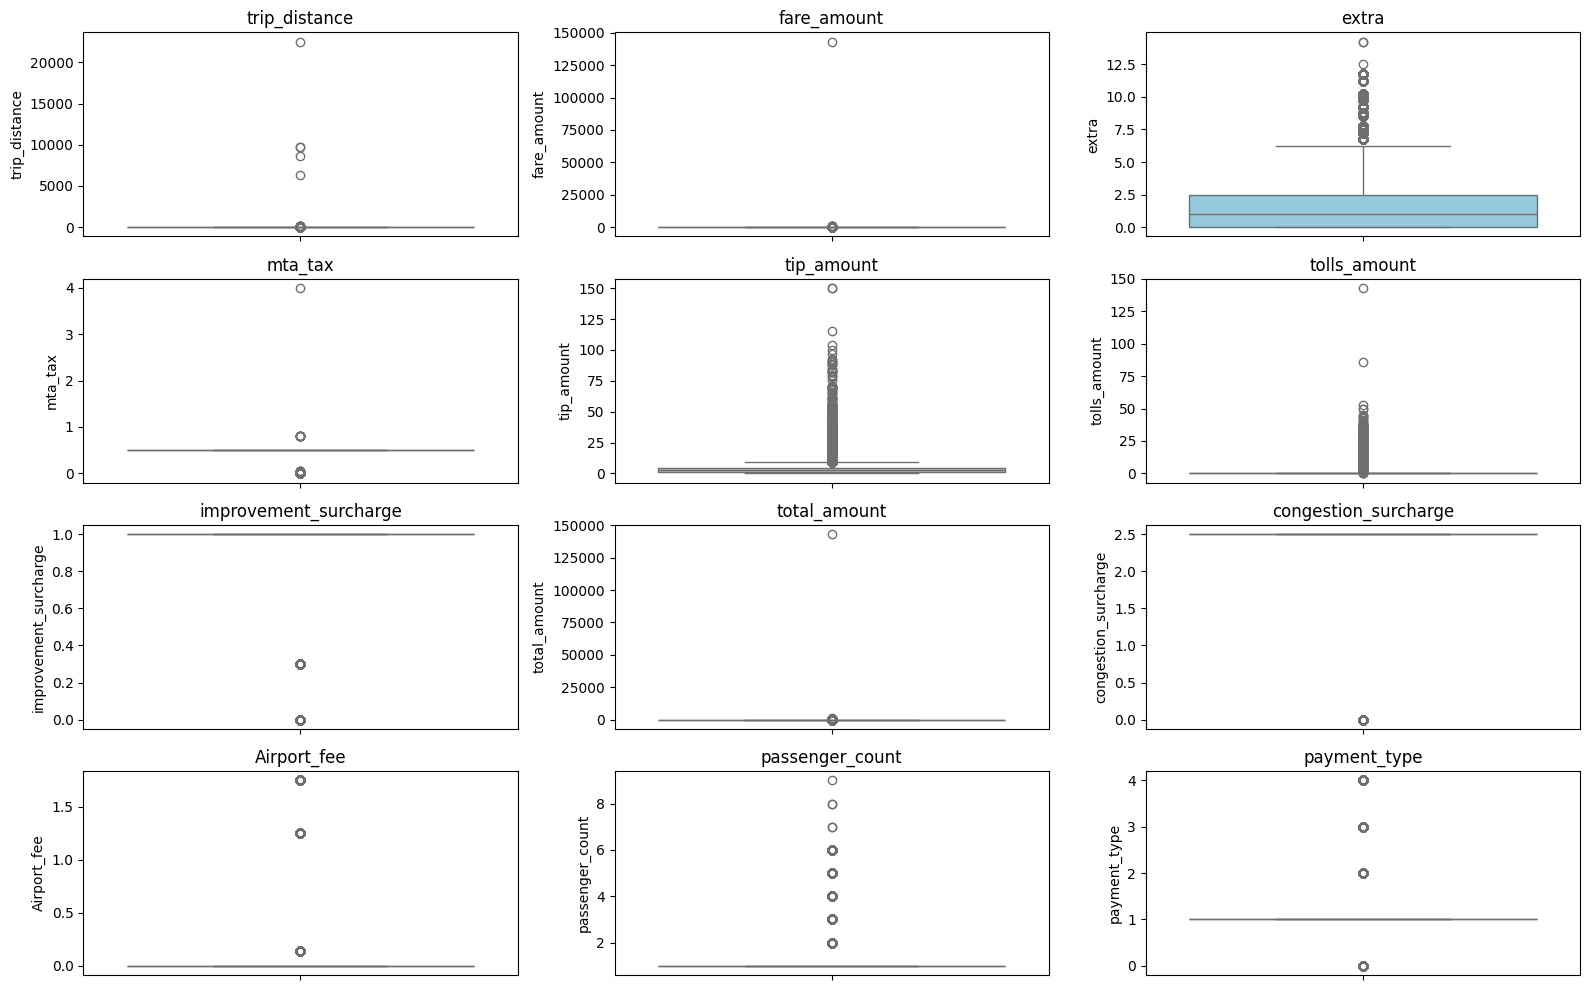

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# - Let's consider below numerical columns for outlier analysis
columns_to_check = [
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'Airport_fee',
    'passenger_count',
    'payment_type'
]

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(16, 10))

for i, col in enumerate(columns_to_check):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns of subplots
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


In [28]:
# Doing a quick Quantile analysis of the numerical columns to make more sense of the box plots we have above. 

outliers = {}

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outlier_rows.empty:
        outliers[col] = {
            'count': len(outlier_rows),
            'percentage': (len(outlier_rows) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

for col, info in outliers.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%), bounds: [{info['lower_bound']}, {info['upper_bound']}]")


trip_distance: 48865 outliers (13.02%), bounds: [-2.46, 6.9]
fare_amount: 38545 outliers (10.27%), bounds: [-9.599999999999998, 40.8]
extra: 6512 outliers (1.74%), bounds: [-3.75, 6.25]
mta_tax: 3477 outliers (0.93%), bounds: [0.5, 0.5]
tip_amount: 28548 outliers (7.61%), bounds: [-4.13, 9.55]
tolls_amount: 30069 outliers (8.01%), bounds: [0.0, 0.0]
improvement_surcharge: 438 outliers (0.12%), bounds: [1.0, 1.0]
total_amount: 43160 outliers (11.50%), bounds: [-6.179999999999996, 52.86]
congestion_surcharge: 27656 outliers (7.37%), bounds: [2.5, 2.5]
Airport_fee: 44358 outliers (11.82%), bounds: [0.0, 0.0]
passenger_count: 83497 outliers (22.26%), bounds: [1.0, 1.0]
payment_type: 79698 outliers (21.24%), bounds: [1.0, 1.0]


### Let's also do some bivariate analysis

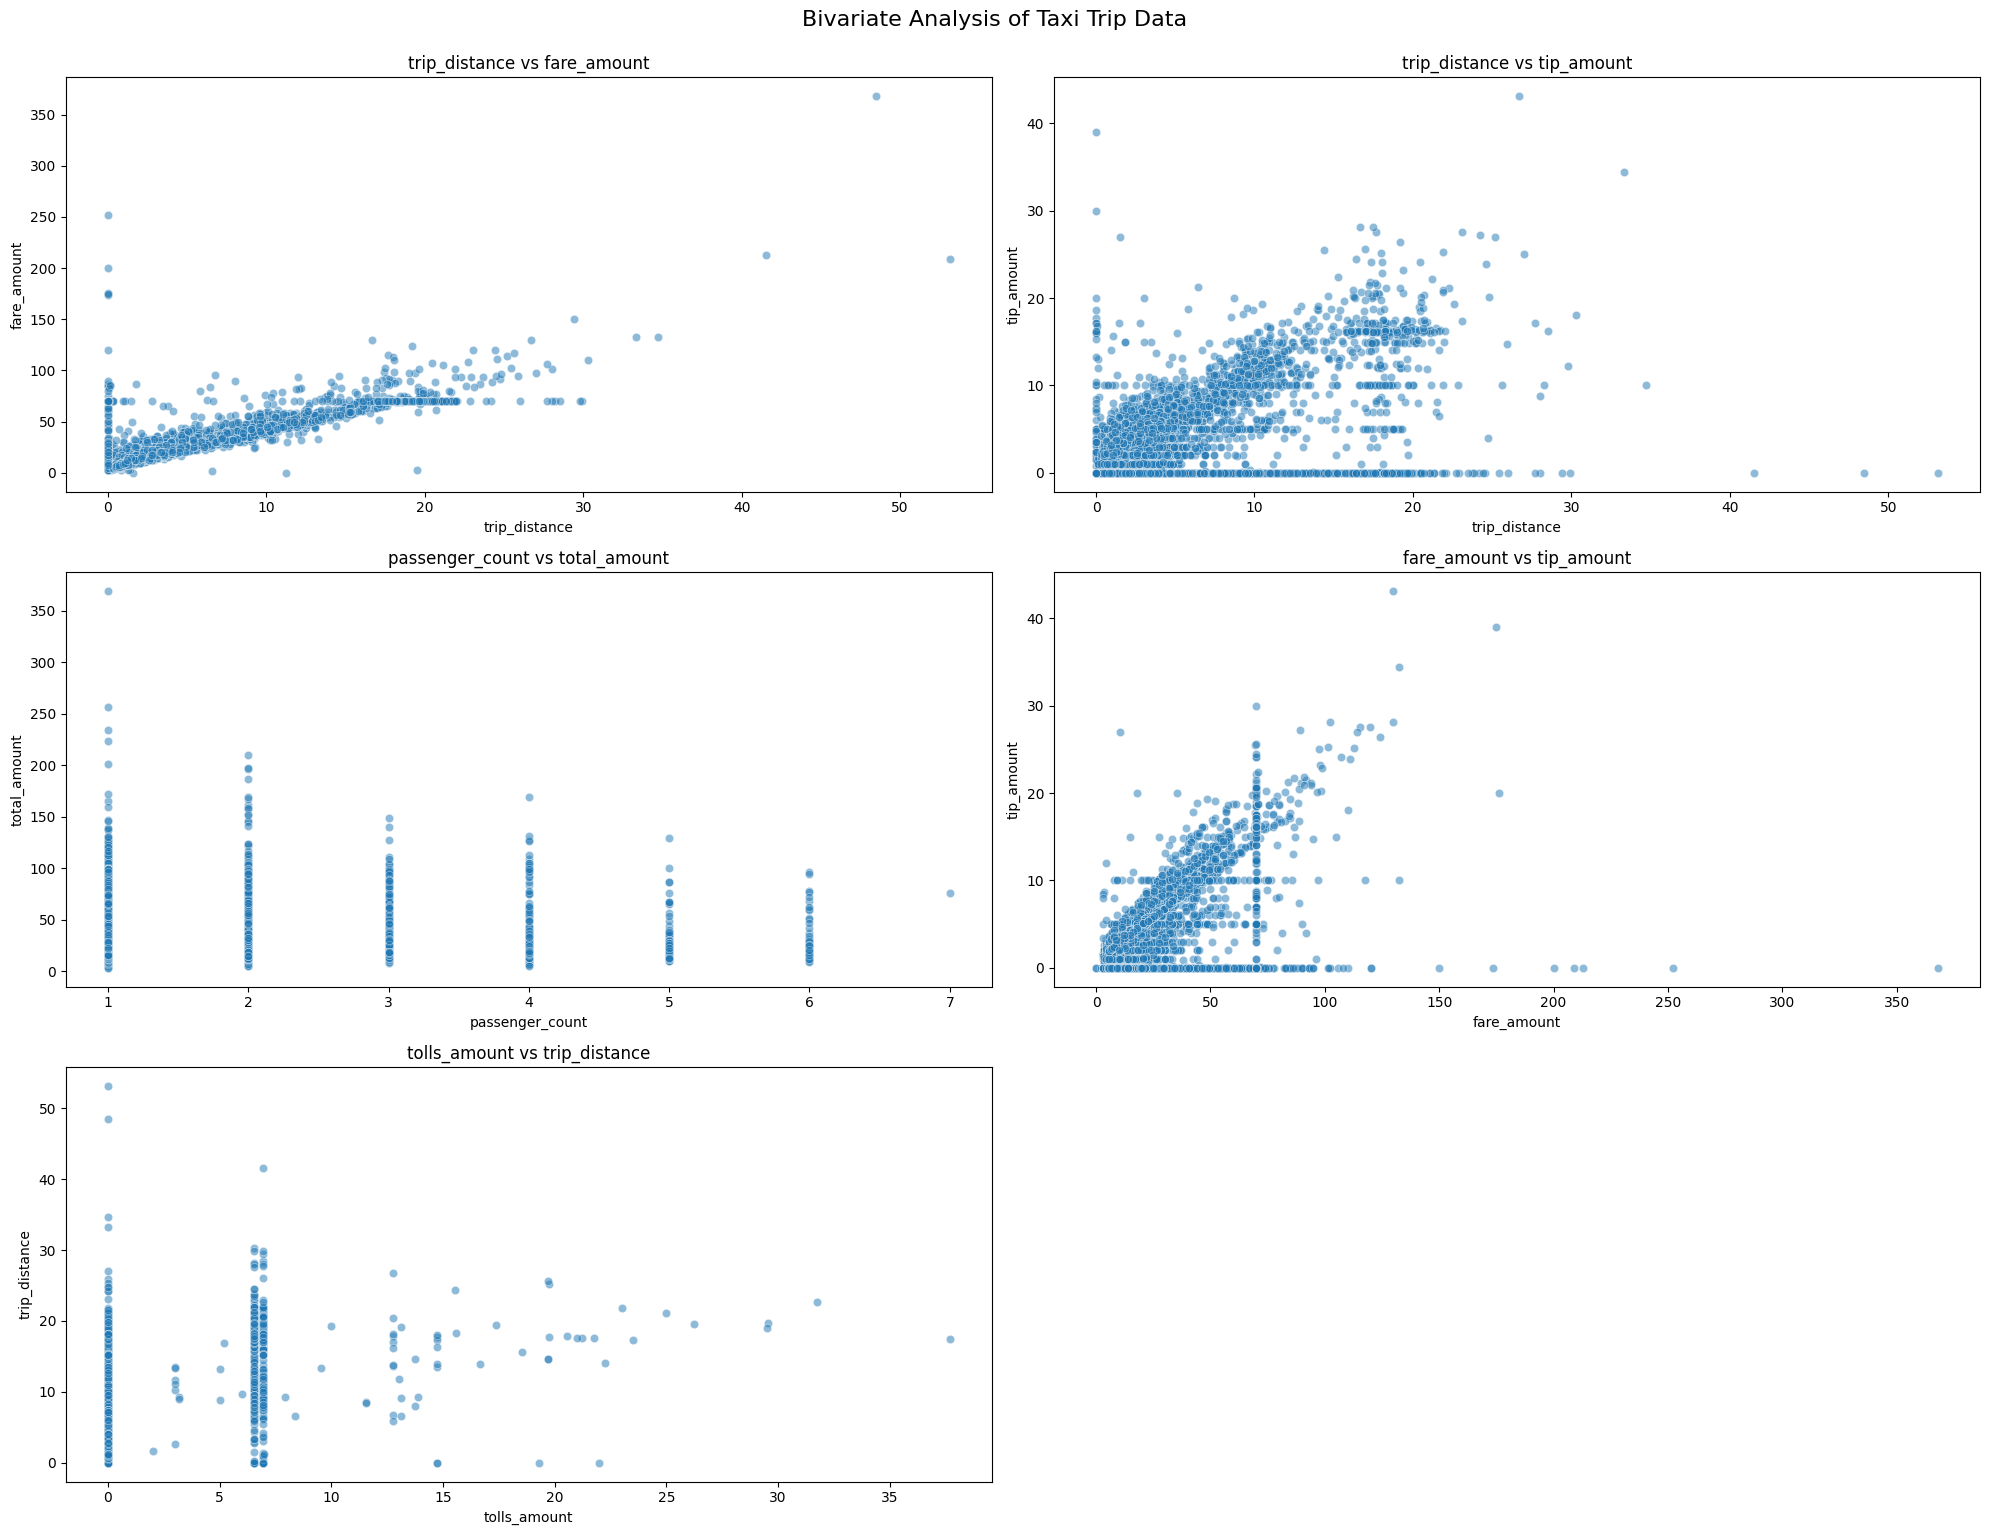

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: use a sample to improve performance and clarity
sample_df = df.sample(n=10000, random_state=42)

# Suggested variable pairs for bivariate analysis
pairs = [
    ('trip_distance', 'fare_amount'),
    ('trip_distance', 'tip_amount'),
    ('passenger_count', 'total_amount'),
    ('fare_amount', 'tip_amount'),
    ('tolls_amount', 'trip_distance')
]

# Set up subplots
plt.figure(figsize=(20, 15))

for i, (x_col, y_col) in enumerate(pairs, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=sample_df, x=x_col, y=y_col, alpha=0.5)
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()

plt.suptitle('Bivariate Analysis of Taxi Trip Data', fontsize=16, y=1.02)
plt.show()


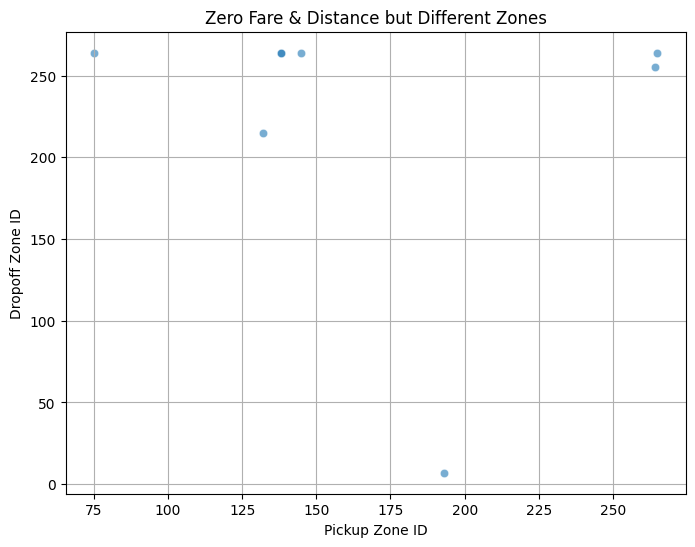

In [30]:
suspicious_df = df[
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=suspicious_df, x='PULocationID', y='DOLocationID', alpha=0.6)
plt.title('Zero Fare & Distance but Different Zones')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Dropoff Zone ID')
plt.grid(True)
plt.show()

### Let's Also add a few plots for Multivariate Analysis. We may discover some outliers and understand data better.

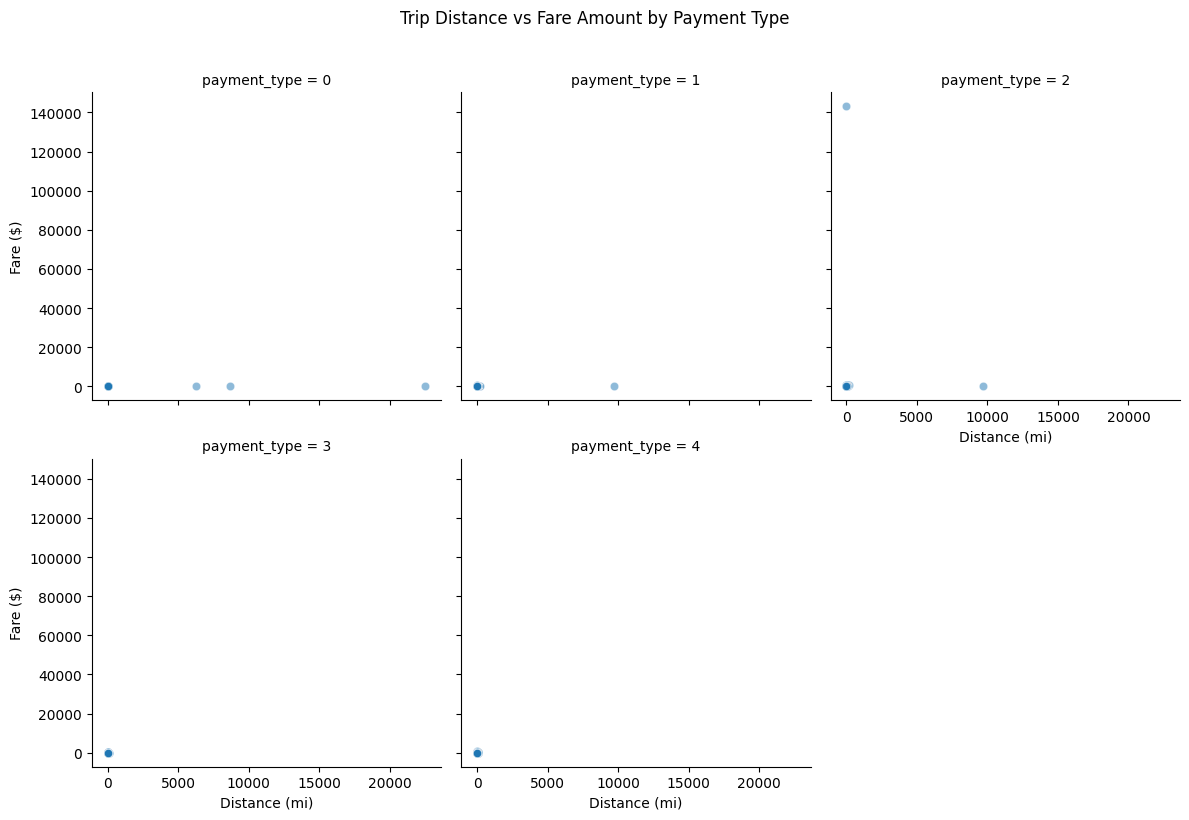

In [31]:
#- Analaysing Trip Distance vs Fare Amount by Payment Type

g = sns.FacetGrid(df, col='payment_type', col_wrap=3, height=4)
g.map(sns.scatterplot, 'trip_distance', 'fare_amount', alpha=0.5)
g.fig.suptitle("Trip Distance vs Fare Amount by Payment Type", y=1.02)
g.set_axis_labels("Distance (mi)", "Fare ($)")
plt.tight_layout()
plt.show()

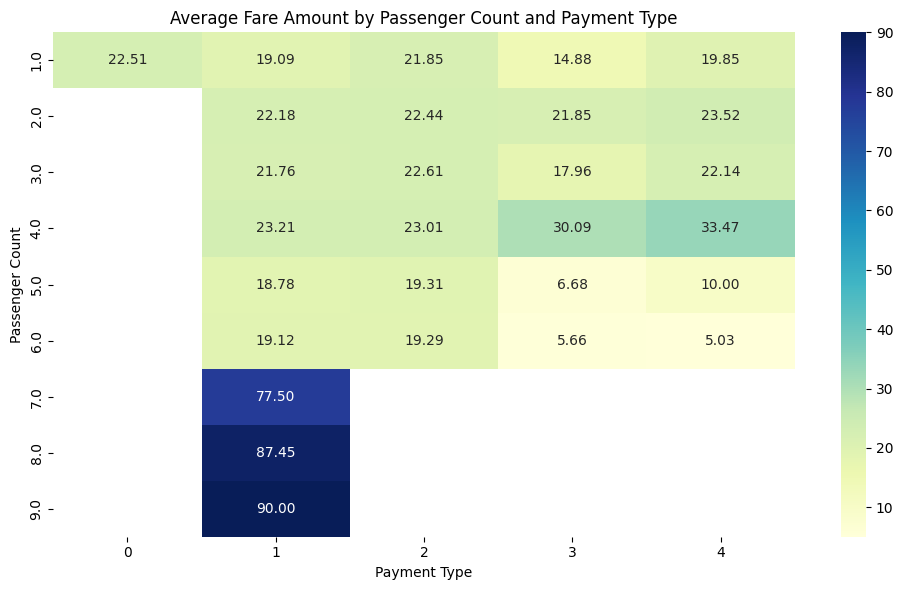

In [32]:
#- Analysisng Average Fare by Passenger Count and Payment Type

pivot_table = df.pivot_table(
    index='passenger_count',
    columns='payment_type',
    values='fare_amount',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Fare Amount by Passenger Count and Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Passenger Count")
plt.tight_layout()
plt.show()

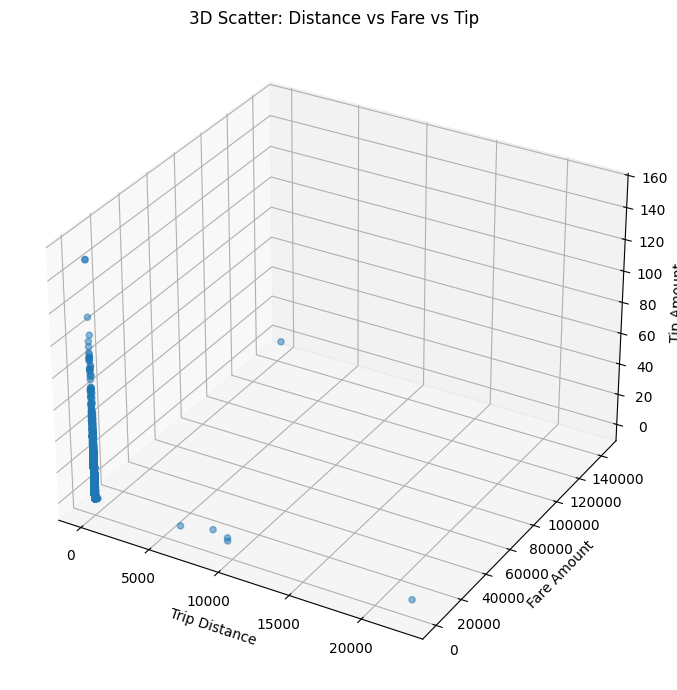

In [33]:
#- 3D Scatter Plot- Distance, Fare, and Tip Amount

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['trip_distance'], df['fare_amount'], df['tip_amount'], alpha=0.5)
ax.set_xlabel('Trip Distance')
ax.set_ylabel('Fare Amount')
ax.set_zlabel('Tip Amount')
plt.title("3D Scatter: Distance vs Fare vs Tip")
plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [34]:
# remove passenger_count > 6

df = df[df['passenger_count'] <= 6]

In [35]:
# Analyzing trip distance outliers
#================================================================================================
# *Though there are only few records, we can see that majority of these records have Airport_fee.
#================================================================================================

df[df['trip_distance'] > 250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
32889          2  2023-03-02 15:45:34   2023-03-02 16:00:45              1.0   
76989          2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   
140123         2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
144065         2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
198483         2  2023-05-12 15:12:50   2023-05-12 16:03:58              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
32889         9674.01         1.0           161            68             1   
76989        22528.82         1.0           116           239             0   
140123        8645.77         1.0           238           230             0   
144065        6284.45         1.0           186           236             0   
198483        9678.78         1.0           138           116             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
32889         14.20    0.0      0.5        2.00          0.00   
76989         17.42    0.0      0.5        0.37          0.00   
140123        13.34    0.0      0.5        4.34          0.00   
144065        16.00    0.0      0.5        0.00          0.00   
198483        47.10    0.0      0.5        0.00          6.55   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
32889                     1.0         20.20                   2.5  2023-03-02   
76989                     1.0         21.79                   2.5  2023-06-13   
140123                    1.0         21.68                   2.5  2023-02-17   
144065                    1.0         20.00                   2.5  2023-02-19   
198483                    1.0         55.15                   0.0  2023-05-12   

        hour  Airport_fee  
32889     15     0.000000  
76989      9     0.141703  
140123     7     0.141703  
144065    22     0.141703  
198483    15     0.000000

In [36]:
# Continue with outlier handling

#- Let's remove the trips where distance is almost 0 but fare is more than 300 as these are possible errors.
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

#- We can also remove the case where trip_distance = 0 and fare_amount = 0, but different zones
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

#- We can cap the trip distance to 250 as there are only 5 records beyond that.
df = df[df['trip_distance'] <= 250]

#- we can fix payment_type = 0 cases by checking what tip amount. If there was a tip, it's credit card payment else it's cash

def impute_payment_type(row):
    if row['tip_amount'] > 0:
        return 1  # Credit card
    elif row['total_amount'] > 0:
        return 2  # Cash
    return 5  # Unknown or keep as is

df['payment_type'] = df.apply(
    lambda row: impute_payment_type(row) if row['payment_type'] == 0 else row['payment_type'],
    axis=1
)

#- Let's cap the fare_amount so that the outliers can be removed, it is important because this outlier may affect a lot of financial analysis statestics and charts as well
fare_cap = df['fare_amount'].quantile(0.99)

#- Filter the DataFrame to exclude fare amounts above the cap
df = df[df['fare_amount'] <= fare_cap]

In [37]:
# Do any columns need standardising?

#Not needed for EDA

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [38]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

## Answer: The monetary parameters listed above all are Numerical.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

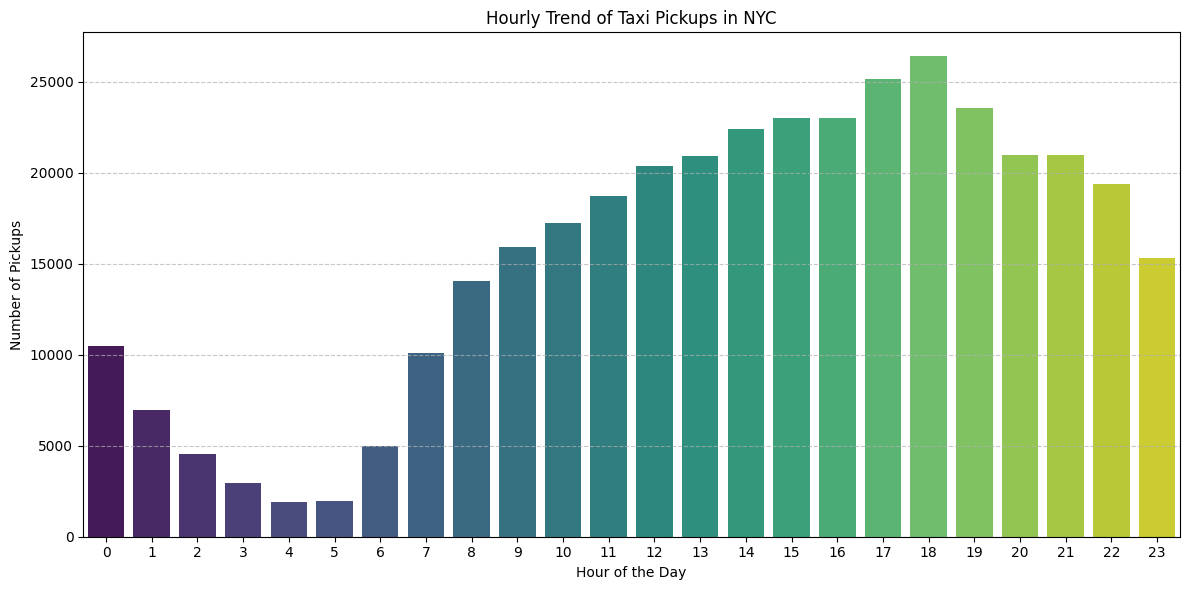

In [39]:
# Find and show the hourly trends in taxi pickups

import matplotlib.pyplot as plt
import seaborn as sns

#- Ensure pickup hour exists
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#- Group by pickup hour and count
hourly_pickups = df.groupby('pickup_hour').size().reset_index(name='pickup_count')

#- Plotting
plt.figure(figsize=(12,6))
sns.barplot(x='pickup_hour', y='pickup_count', data=hourly_pickups, palette='viridis')
plt.title('Hourly Trend of Taxi Pickups in NYC')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [40]:
# Find and show the daily trends in taxi pickups (days of the week)

#- Add a new column for day of the week (0 = Monday, 6 = Sunday)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

#- Map to actual day names for better readability
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day'] = df['pickup_day'].map(day_map)

#- Group by day of the week and count pickups
daily_pickups = df.groupby('pickup_day').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index(name='pickup_count')

#- Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='pickup_day', y='pickup_count', data=daily_pickups, palette='coolwarm')
plt.title('Daily Trend of Taxi Pickups (Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

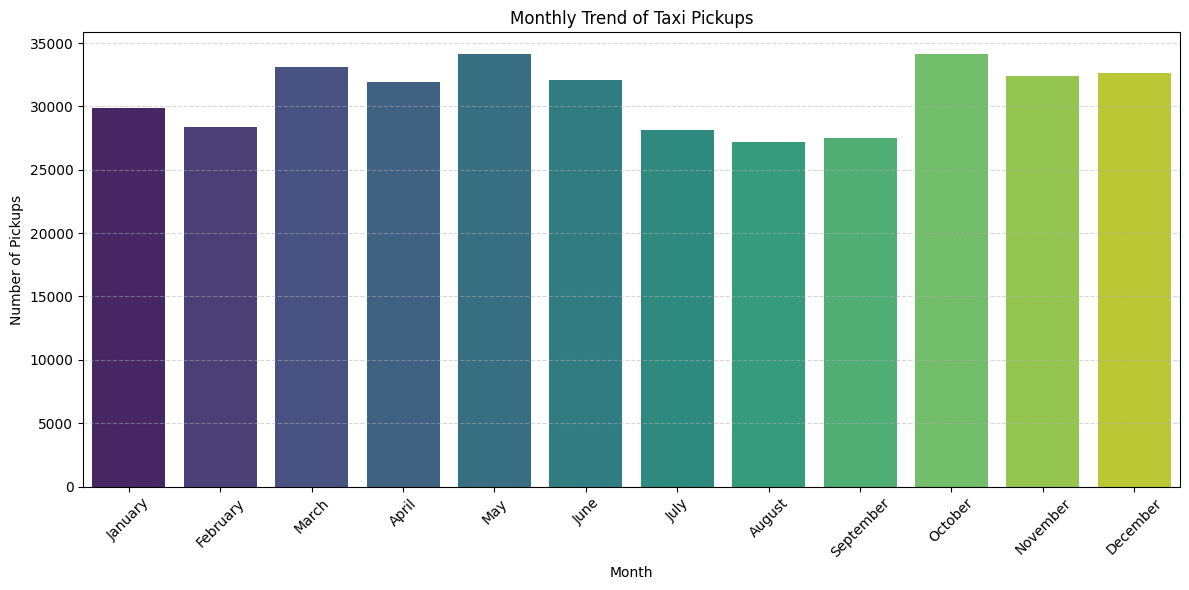

In [41]:
# Show the monthly trends in pickups

#- Extract month from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

#- Map month numbers to names (optional but makes the chart cleaner)
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['pickup_month'] = df['pickup_month'].map(month_map)

#- Group by month and count pickups
monthly_pickups = df['pickup_month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
).reset_index()
monthly_pickups.columns = ['Month', 'Pickup Count']

#- Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Pickup Count', data=monthly_pickups, palette='viridis')
plt.title('Monthly Trend of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [42]:
# Analyse the above parameters

#- Columns to analyze
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

#- Analyze each column
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col} -> Zero values: {zero_count}, Negative values: {negative_count}")

fare_amount -> Zero values: 108, Negative values: 0
tip_amount -> Zero values: 84651, Negative values: 0
total_amount -> Zero values: 50, Negative values: 0
trip_distance -> Zero values: 6931, Negative values: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [43]:
# Create a df with non zero entries for the selected parameters.

df_filtered = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
]

print(f"Original Data Shape: {df.shape}")
print(f"Filtered Data Shape: {df_filtered.shape}")

Original Data Shape: (371457, 23)
Filtered Data Shape: (364466, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

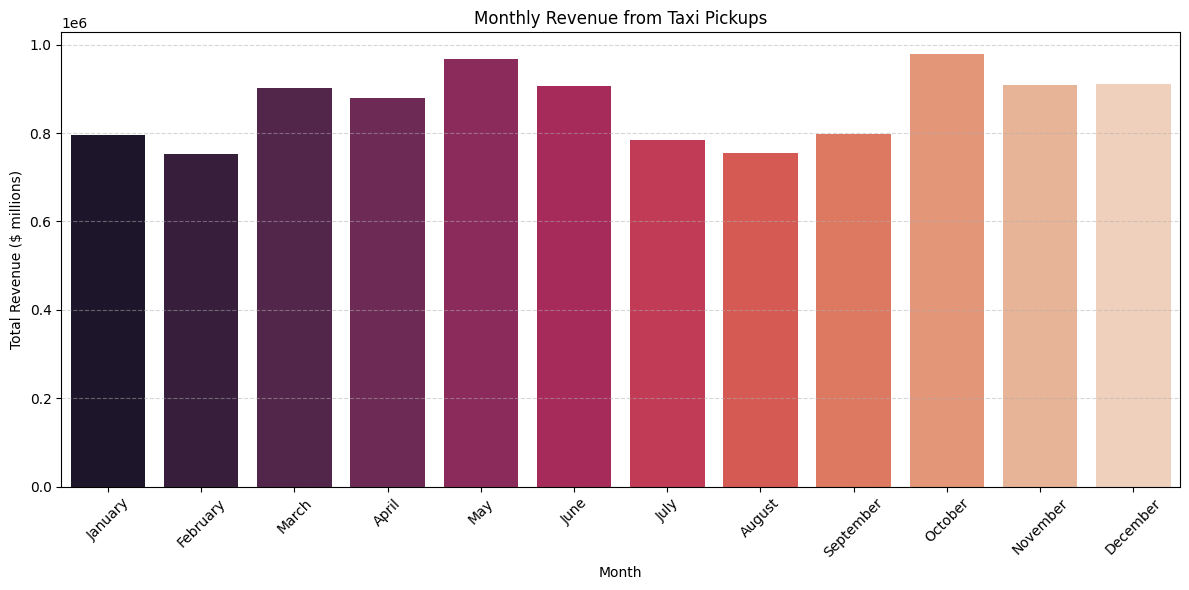

In [44]:
# Group data by month and analyse monthly revenue

#- Group by month and sum the total revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reindex(month_map.values()).reset_index()
monthly_revenue.columns = ['Month', 'Total Revenue']

#- Plotting the monthly revenue
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Total Revenue', data=monthly_revenue, palette='rocket')
plt.title('Monthly Revenue from Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($ millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

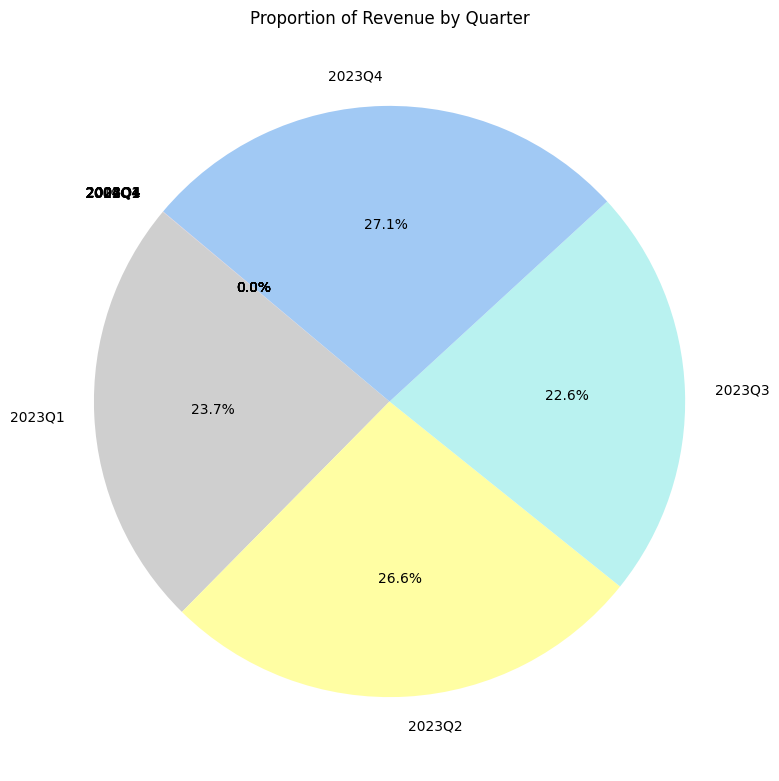

In [45]:
# Calculate proportion of each quarter

#- Step 1: Add a 'Quarter' column
df['Quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q').astype(str)

#- Step 2: Group by 'Quarter' and sum up total revenue
quarterly_revenue = df.groupby('Quarter')['total_amount'].sum().reset_index()
quarterly_revenue.columns = ['Quarter', 'Total Revenue']

#- Step 3: Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    quarterly_revenue['Total Revenue'], 
    labels=quarterly_revenue['Quarter'], 
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=140
)
plt.title('Proportion of Revenue by Quarter')
plt.tight_layout()
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [46]:
# Show how trip fare is affected by distance

df = df[df['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='trip_distance', 
    y='fare_amount',
    alpha=0.3
)
plt.title('Trip Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

In [47]:
# Let's find the correlation between trip distance and fare_amount

correlation = df['trip_distance'].corr(df['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.4f}")

Correlation between trip distance and fare amount: 0.9524


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

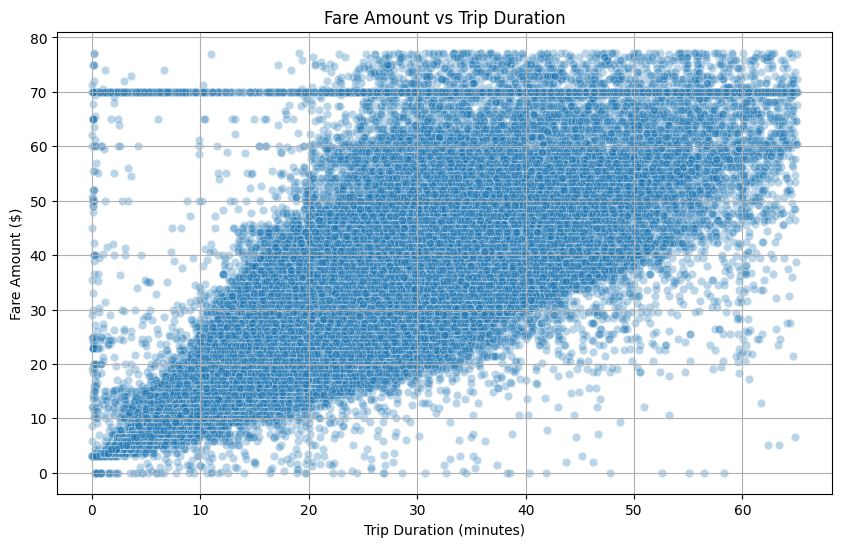

Correlation (Fare vs Trip Duration): 0.8831


In [48]:
# Show relationship between fare and trip duration

#- First ensure trip_duration is in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

#- Remove trips with duration = 0 or extreme outliers
duration_cap = df['trip_duration'].quantile(0.99)
filtered_df1 = df[(df['trip_duration'] > 0) & (df['trip_duration'] <= duration_cap)]

#- Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered_df1, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

# Correlation
corr1 = filtered_df1['trip_duration'].corr(filtered_df1['fare_amount'])
print(f"Correlation (Fare vs Trip Duration): {corr1:.4f}")


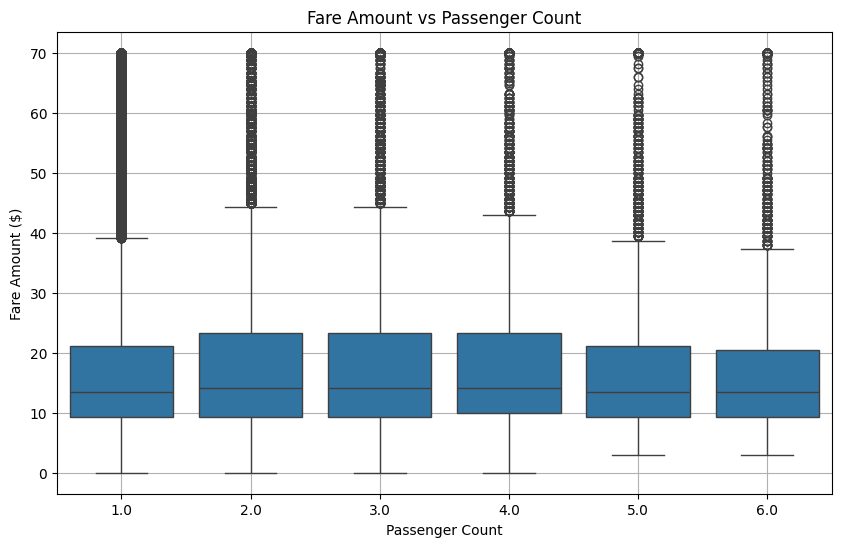

Correlation (Fare vs Passenger Count): 0.0382


In [49]:
# Show relationship between fare and number of passengers

#- Filter very high fares and invalid passenger counts
fare_cap = df['fare_amount'].quantile(0.99)
filtered_df2 = df[(df['fare_amount'] <= fare_cap) & (df['passenger_count'] > 0)]

#- Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_df2, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

#- Correlation
corr2 = filtered_df2['passenger_count'].corr(filtered_df2['fare_amount'])
print(f"Correlation (Fare vs Passenger Count): {corr2:.4f}")


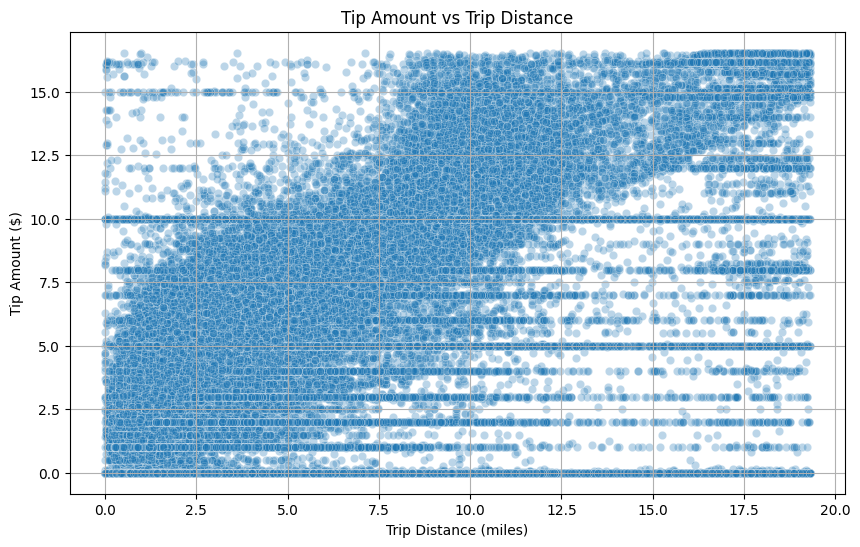

Correlation (Tip vs Trip Distance): 0.5588


In [50]:
# Show relationship between tip and trip distance

#- Remove extreme tips and distances
tip_cap = df['tip_amount'].quantile(0.99)
dist_cap = df['trip_distance'].quantile(0.99)
filtered_df3 = df[(df['tip_amount'] <= tip_cap) & (df['trip_distance'] <= dist_cap)]

#- Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered_df3, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

# Correlation
corr3 = filtered_df3['trip_distance'].corr(filtered_df3['tip_amount'])
print(f"Correlation (Tip vs Trip Distance): {corr3:.4f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

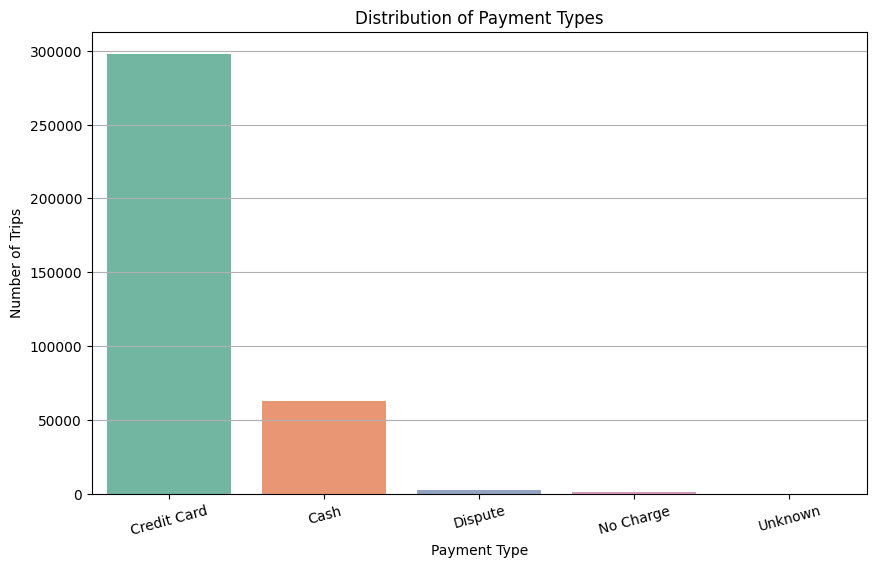

In [51]:
# Analyse the distribution of different payment types (payment_type).

#- Mapping based on typical NYC taxi dataset
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df['payment_label'] = df['payment_type'].map(payment_mapping)
payment_counts_named = df['payment_label'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=payment_counts_named.index, y=payment_counts_named.values, palette='Set2')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=15)
plt.grid(True, axis='y')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [53]:
#os.chdir("C:/Users/asahmed/Desktop/Temp/UpGrad")

In [54]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [55]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

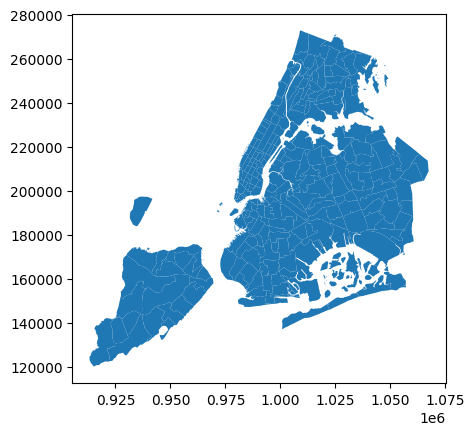

In [56]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [57]:
# Merge zones and trip records using locationID and PULocationID

#- Rename for clarity before merge
zones_renamed = zones.rename(columns={
    'zone': 'pickup_zone',
    'borough': 'pickup_borough'
})

#- Merge with trip data on PULocationID
df = df.merge(
    zones_renamed[['LocationID', 'pickup_zone', 'pickup_borough']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)

#- Drop duplicate LocationID column if not needed
df = df.drop(columns=['LocationID'])

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [58]:
# Group data by location and calculate the number of trips

pickup_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')
pickup_counts = pickup_counts.sort_values(by='trip_count', ascending=False)

In [59]:
pickup_counts

PULocationID  trip_count
212           237       17380
115           132       17306
143           161       17043
211           236       15631
144           162       13121
..            ...         ...
181           204           1
158           178           1
163           183           1
101           118           1
170           192           1

[240 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [60]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_counts = zones.merge(pickup_counts, how='left', left_on='LocationID', right_on='PULocationID')

#- Fill NaN trip counts with 0 for zones with no pickups
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0).astype(int)

zones_with_counts.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0           4  
1           NaN           0  
2           3.0           9  
3           4.0         416  
4           5.0           2

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

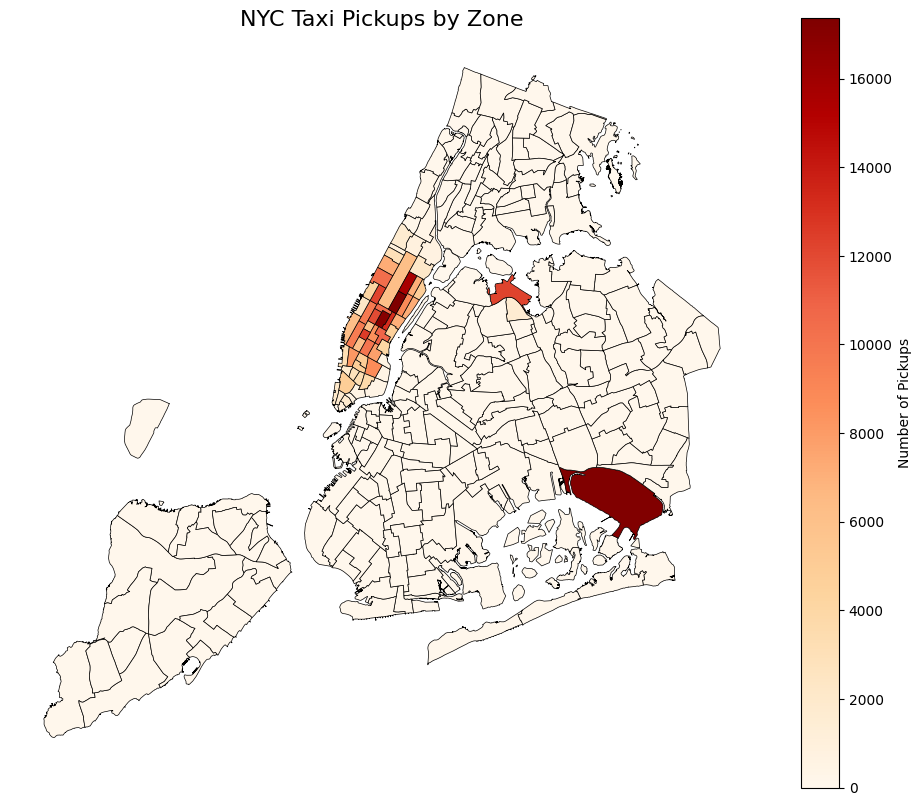

In [61]:
import matplotlib.pyplot as plt

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it

zones_with_counts.plot(
    column='trip_count',              # Column to base the color on
    ax=ax,                            # Axis to plot on
    cmap='OrRd',                      # Color map ('OrRd' = Orange-Red)
    legend=True,                      # Show legend
    legend_kwds={
        'label': "Number of Pickups",
        'orientation': "vertical"     # Can also be "horizontal"
    },
    edgecolor='black',                # Optional: draw borders
    linewidth=0.5                     # Optional: border thickness
)

#- Adding title and removing axes
ax.set_title('NYC Taxi Pickups by Zone', fontsize=16)
ax.set_axis_off()

#- Showing the plot
plt.show()

In [62]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_counts_sorted = zones_with_counts.sort_values(by='trip_count', ascending=False)
zones_with_counts_sorted[['LocationID', 'zone', 'borough', 'trip_count']].head(10)

LocationID                          zone    borough  trip_count
236         237         Upper East Side South  Manhattan       17380
131         132                   JFK Airport     Queens       17306
160         161                Midtown Center  Manhattan       17043
235         236         Upper East Side North  Manhattan       15631
161         162                  Midtown East  Manhattan       13121
185         186  Penn Station/Madison Sq West  Manhattan       12500
137         138             LaGuardia Airport     Queens       12277
141         142           Lincoln Square East  Manhattan       12166
229         230     Times Sq/Theatre District  Manhattan       11946
169         170                   Murray Hill  Manhattan       10818

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


### Conclusions and Findings:

- **Busiest Hour**: Most trips happen between **5 PM and 6 PM**.
- **Busiest Day**: **Thursday** sees the highest number of trips in a week.
- **Busiest Months**: **May** and **October** have the highest number of pickups.
- **Revenue Follows Demand**: Months with more trips also bring in more revenue, confirming that busier months are more profitable.
- **Top Revenue Quarters**: 
  - **Q2** contributes **26.6%** of annual revenue.
  - **Q4** contributes **27.1%** of annual revenue.
- **Trip Distance ↔ Fare**: Very strong correlation (**0.95**) – longer trips usually cost more.
- **Trip Duration ↔ Fare**: Strong positive correlation (**0.88**) – longer trips take more time and cost more.
- **Passenger Count ↔ Fare**: Very weak correlation (**0.03**) – fare doesn't vary much with the number of passengers.
- **Trip Distance ↔ Tip Amount**: Moderate correlation (**0.55**) – longer trips often get better tips.
- **Payment Method**: **Credit cards** are the most commonly used payment type.

### Geographic Analysis

- **High-Demand Zones**: 
  - **JFK Airport**
  - **Downtown Manhattan**
  
  These zones consistently record the highest number of pickups and drop-offs.


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [63]:
# Find routes which have the slowest speeds at different times of the day

#- Keep only trips with positive duration and distance
df = df[
    (df['tpep_dropoff_datetime'] > df['tpep_pickup_datetime']) &
    (df['trip_distance'] > 0)
]

#- Recalculate duration in hours
df['trip_duration_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

#- Drop entries with very small duration (e.g. less than 1 min)
df = df[df['trip_duration_hours'] > (1 / 60)]

#- Groupping by route and hour
route_hourly_stats = df.groupby(['PULocationID', 'DOLocationID', 'hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_hours': 'mean'
}).reset_index()

#- Computing speed (miles per hour)
route_hourly_stats['avg_speed_mph'] = route_hourly_stats['trip_distance'] / route_hourly_stats['trip_duration_hours']

#- Sorting to find slowest routes
slow_routes = route_hourly_stats.sort_values(by='avg_speed_mph').dropna()



In [64]:
slow_routes

PULocationID  DOLocationID  hour  trip_distance  trip_duration_hours  \
51563           226           145    18       1.200000            45.165000   
66792           260           129    17       0.960000            23.560556   
19993           113           235    22       0.280000             5.820556   
6328             50            43     8       1.420000            23.855556   
35985           148            45    23       0.800000            12.065139   
...             ...           ...   ...            ...                  ...   
35623           145           145    13       1.300000             0.019167   
45541           168           138     2      15.040000             0.216667   
24182           132           132     2       6.356667             0.062407   
35620           145           145     9       4.850000             0.039444   
14658            89            89    13      13.700000             0.062222   

       avg_speed_mph  
51563       0.026569  
66792       0.040746  
19993       0.048105  
6328        0.059525  
35985       0.066307  
...              ...  
35623      67.826087  
45541      69.415385  
24182     101.857567  
35620     122.957746  
14658     220.178571  

[70300 rows x 6 columns]

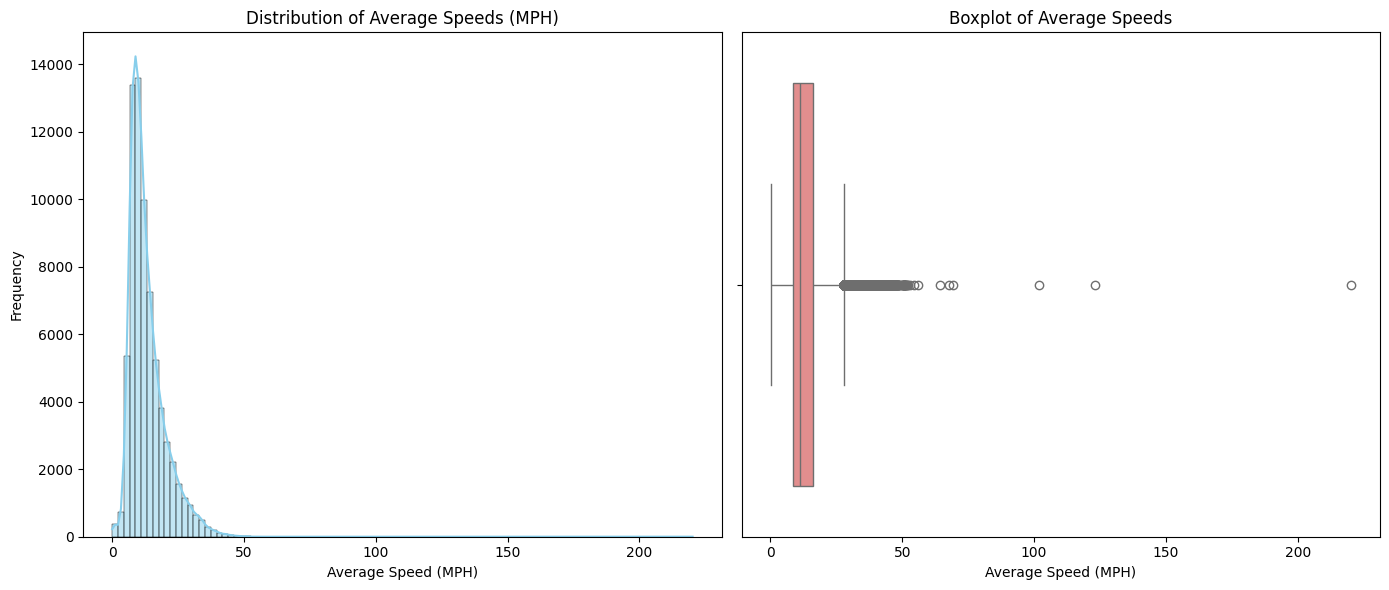

In [65]:
#- Let's plot and see what this data looks like 

plt.figure(figsize=(14, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(route_hourly_stats['avg_speed_mph'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Average Speeds (MPH)')
plt.xlabel('Average Speed (MPH)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=route_hourly_stats['avg_speed_mph'], color='lightcoral')
plt.title('Boxplot of Average Speeds')
plt.xlabel('Average Speed (MPH)')

plt.tight_layout()
plt.show()

In [66]:
#- We observe that three trips have unusually high speed for an NYC cab. This possibly was a meter reading or sensor reading issue.

#- Let's remove them
#- Calculate speed (mph)
df['trip_speed_mph'] = df['trip_distance'] / df['trip_duration_hours']

# Define upper speed limit (e.g. 100 mph)
MAX_REASONABLE_SPEED = 100

# Filter out trips with unrealistic speeds
df = df[df['trip_speed_mph'] <= MAX_REASONABLE_SPEED]


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [67]:
# Visualise the number of trips per hour and find the busiest hour

#- Extract hour from pickup datetime if not already done
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#- Group by hour and count trips
hourly_trips = df.groupby('pickup_hour').size()

#- Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Taxi Trips by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

#- Find busiest hour
busiest_hour = hourly_trips.idxmax()
busiest_count = hourly_trips.max()

print(f" Busiest hour: {busiest_hour}:00 with {busiest_count:,} trips.")


 Busiest hour: 18:00 with 25,868 trips.


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [68]:
sampling_ratio = 0.01  # My sample fraction was 0.01
adjusted_hourly_trips = hourly_trips / sampling_ratio

#- Plot adjusted counts
plt.figure(figsize=(12, 6))
sns.barplot(x=adjusted_hourly_trips.index, y=adjusted_hourly_trips.values, palette="magma")
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Total Number of Trips')
plt.title('Estimated Taxi Trips by Hour of Day (Scaled)')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

#- Busiest hour after scaling
busiest_hour = adjusted_hourly_trips.idxmax()
busiest_count = adjusted_hourly_trips.max()

print(f" Estimated busiest hour: {busiest_hour}:00 with approximately {busiest_count:,.0f} trips.")


 Estimated busiest hour: 18:00 with approximately 2,586,800 trips.


**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [69]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01

#- Step 1: Count trips per hour (in sampled data)
hourly_trip_counts = df['pickup_hour'].value_counts().sort_values(ascending=False)

#- Step 2: Get top 5 busiest hours from sampled data
top5_hours_sampled = hourly_trip_counts.head(5)

#- Step 3: Scale up using the sampling ratio
top5_hours_actual = top5_hours_sampled / sample_fraction

#- Step 4: Display results
print("Actual number of trips in the 5 busiest hours (scaled):")
for hour, count in top5_hours_actual.items():
    print(f"Hour {hour:02d}:00 — {int(count):,} trips")


Actual number of trips in the 5 busiest hours (scaled):
Hour 18:00 — 2,586,800 trips
Hour 17:00 — 2,464,500 trips
Hour 19:00 — 2,311,700 trips
Hour 15:00 — 2,257,400 trips
Hour 16:00 — 2,256,800 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Figure size 1200x600 with 0 Axes>

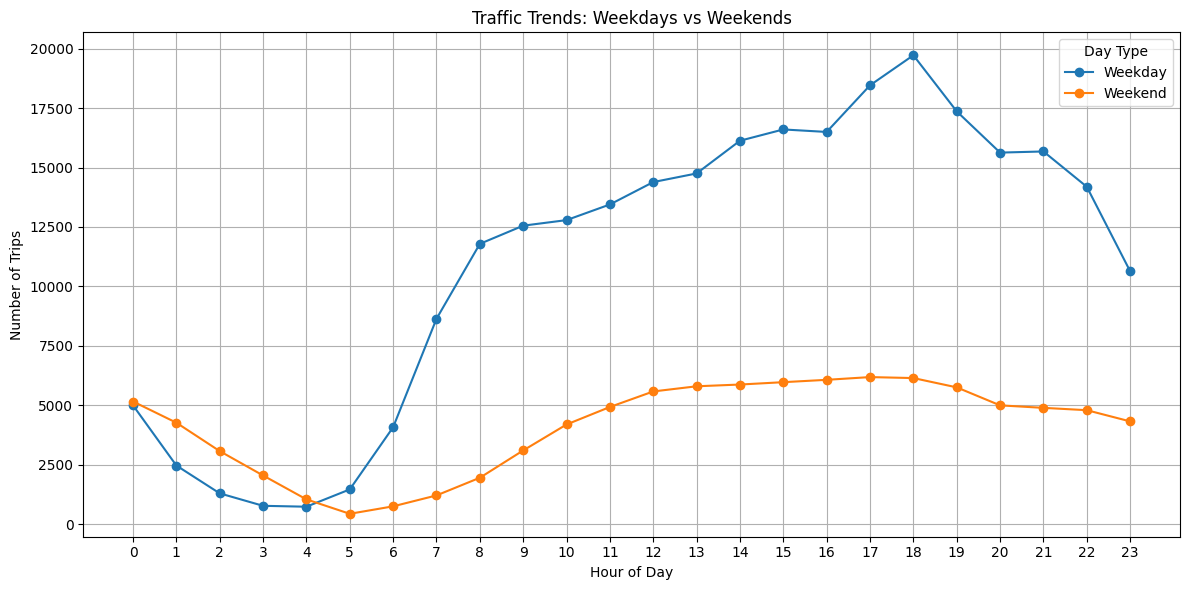

In [70]:
# Compare traffic trends for the week days and weekends

#- Step 1: Extract day of week (0=Monday, 6=Sunday)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

#- Step 2: Create a new column to mark weekend vs weekday
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

#- Step 3: Group by pickup_hour and day_type
hourly_trend = df.groupby(['pickup_hour', 'day_type']).size().unstack().fillna(0)

#- Step 4: Plot
plt.figure(figsize=(12,6))
hourly_trend.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Traffic Trends: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0,24))
plt.grid(True)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [71]:
# Find top 10 pickup and dropoff zones

#- Find the top 10 pickup zones with the highest number of pickups
top_10_pickup_zones = df.groupby('PULocationID').size().nlargest(10)

#- Find the top 10 dropoff zones with the highest number of dropoffs
top_10_dropoff_zones = df.groupby('DOLocationID').size().nlargest(10)

#- Display results
print("Top 10 Pickup Zones:\n", top_10_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_10_dropoff_zones)


Top 10 Pickup Zones:
 PULocationID
237    17350
132    17194
161    17004
236    15602
162    13098
186    12489
138    12237
142    12146
230    11920
170    10799
dtype: int64

Top 10 Dropoff Zones:
 DOLocationID
236    16417
237    15587
161    14343
230    11123
170    10900
162    10465
142    10430
239    10230
141     9659
68      9376
dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [72]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

#- Group by pickup and dropoff zones, then calculate pickup/dropoff ratios
pickup_dropoff_counts = df.groupby(['PULocationID', 'DOLocationID']).size().unstack(fill_value=0)

#- Calculate pickup to dropoff ratios
pickup_dropoff_ratios = pickup_dropoff_counts.sum(axis=1) / pickup_dropoff_counts.sum(axis=0)

#- Find the top 10 and bottom 10 zones based on the ratio
top_10_ratio_zones = pickup_dropoff_ratios.nlargest(10)
bottom_10_ratio_zones = pickup_dropoff_ratios.nsmallest(10)

#- Display results
print("Top 10 Pickup/Dropoff Ratios:\n", top_10_ratio_zones)
print("\nBottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratio_zones)

Top 10 Pickup/Dropoff Ratios:
 70     9.355030
132    4.474109
138    2.688860
23     2.333333
186    1.529952
43     1.387442
249    1.352592
114    1.350624
162    1.251601
161    1.185526
dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
 192    0.025000
101    0.032258
178    0.040000
257    0.040000
31     0.045455
102    0.051948
64     0.052632
252    0.054054
120    0.055556
16     0.057143
dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [73]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

#- Filter the data for night hours (11 PM to 5 AM)
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

#- Find top 10 pickup zones during night hours
top_10_night_pickup_zones = night_df.groupby('PULocationID').size().nlargest(10)

#- Find top 10 dropoff zones during night hours
top_10_night_dropoff_zones = night_df.groupby('DOLocationID').size().nlargest(10)

#- Display results
print("Top 10 Night Pickup Zones:\n", top_10_night_pickup_zones)
print("\nTop 10 Night Dropoff Zones:\n", top_10_night_dropoff_zones)

Top 10 Night Pickup Zones:
 PULocationID
79     3107
132    2556
249    2551
48     2006
148    1932
114    1689
230    1660
186    1362
164    1208
138    1199
dtype: int64

Top 10 Night Dropoff Zones:
 DOLocationID
79     1694
48     1420
170    1260
107    1160
68     1148
141    1073
263    1025
249     926
229     887
236     879
dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [74]:
# Filter for night hours (11 PM to 5 AM)

#- Filter the data for night hours (11 PM to 5 AM) and daytime hours (6 AM to 10 PM)
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
day_df = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]

#- Calculate total revenue for night and day hours
night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()

#- Calculate revenue share
total_revenue = night_revenue + day_revenue
night_revenue_share = night_revenue / total_revenue * 100
day_revenue_share = day_revenue / total_revenue * 100

#- Display results
print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")

Nighttime Revenue Share: 12.00%
Daytime Revenue Share: 88.00%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [75]:
# Analyse the fare per mile per passenger for different passenger counts

#- Calculate fare per mile for each trip
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

#- Group by passenger_count and calculate average fare per mile per passenger
average_fare_per_passenger = df.groupby('passenger_count')['fare_per_mile'].mean() / df.groupby('passenger_count')['passenger_count'].mean()

#- Display the results
print(average_fare_per_passenger)



passenger_count
1.0    8.281668
2.0    4.187183
3.0    2.638525
4.0    2.206715
5.0    1.531042
6.0    1.278152
dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [76]:
# Compare the average fare per mile for different days and for different times of the day

#- Calculate the average fare per mile by hour of the day
avg_fare_by_hour = df.groupby('pickup_hour')['fare_per_mile'].mean()

#- Calculate the average fare per mile by day of the week
avg_fare_by_day = df.groupby('pickup_day')['fare_per_mile'].mean()

# Display the results
print("Average Fare per Mile by Hour of the Day:")
print(avg_fare_by_hour)

print("\nAverage Fare per Mile by Day of the Week:")
print(avg_fare_by_day)

Average Fare per Mile by Hour of the Day:
pickup_hour
0     7.538711
1     6.695578
2     7.347154
3     7.627664
4     8.502352
5     5.973379
6     6.250145
7     7.116149
8     7.787959
9     8.011790
10    8.304450
11    8.705015
12    9.070738
13    8.994731
14    9.689186
15    9.373740
16    8.864649
17    9.326592
18    8.357537
19    8.255382
20    7.401506
21    7.178672
22    7.635153
23    6.831026
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Day of the Week:
pickup_day
Friday       8.122037
Monday       8.094935
Saturday     8.439474
Sunday       7.585538
Thursday     8.540521
Tuesday      8.480576
Wednesday    8.538880
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [77]:
# Compare fare per mile for different vendors

#- Remove infinite or NaN values due to zero distance
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['fare_per_mile'])

#- Group by VendorID and pickup_hour
vendor_hourly_fare = df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().unstack(level=0)

#- Plot
plt.figure(figsize=(12, 6))
vendor_hourly_fare.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Average Fare per Mile by Hour of the Day for Each Vendor')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.legend(title='VendorID')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


<Figure size 1200x600 with 0 Axes>

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


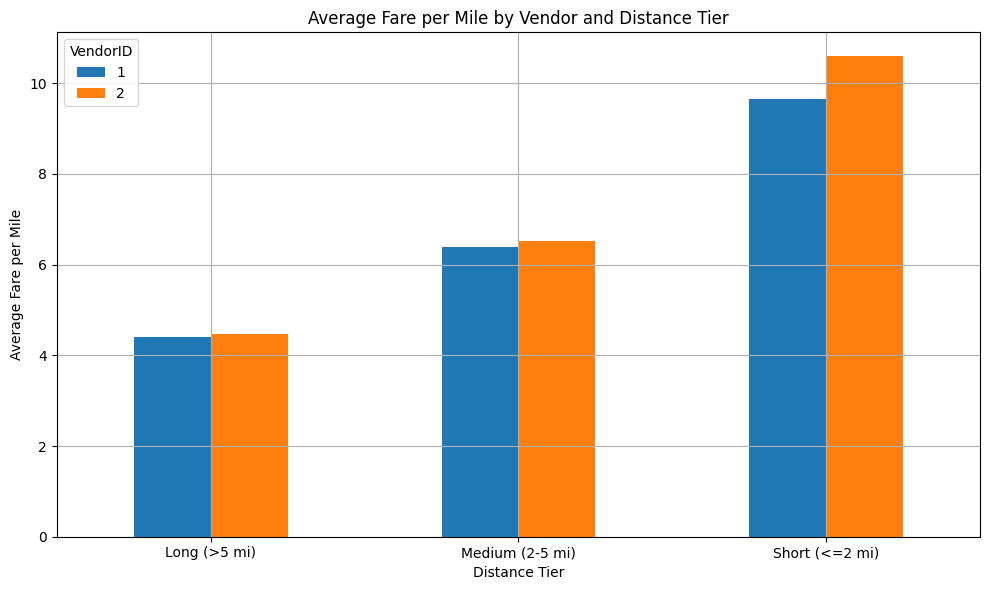

In [78]:
# Defining distance tiers

#- Categorize distance into tiers
def distance_tier(dist):
    if dist <= 2:
        return 'Short (<=2 mi)'
    elif dist <= 5:
        return 'Medium (2-5 mi)'
    else:
        return 'Long (>5 mi)'

df['distance_tier'] = df['trip_distance'].apply(distance_tier)

#- Group by Vendor and Distance Tier
tiered_fare = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

#- Plot
tiered_fare.T.plot(kind='bar', figsize=(10,6))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.legend(title='VendorID')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

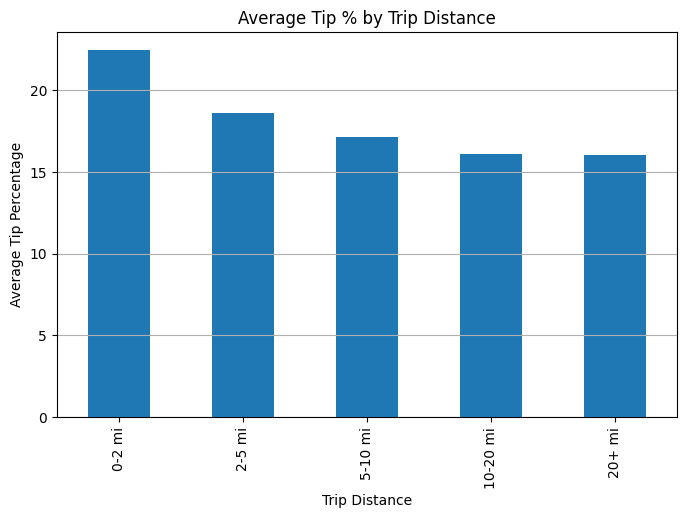

In [79]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

#- Avoid division by zero and filter out invalid fare_amounts
df = df[df['fare_amount'] > 0]
df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['tip_percent'])

#- Define distance bins
distance_bins = [0, 2, 5, 10, 20, df['trip_distance'].max()]
distance_labels = ['0-2 mi', '2-5 mi', '5-10 mi', '10-20 mi', '20+ mi']
df['distance_bin'] = pd.cut(df['trip_distance'], bins=distance_bins, labels=distance_labels)

#- Group and visualize
tip_by_distance = df.groupby('distance_bin')['tip_percent'].mean()

# Plot
tip_by_distance.plot(kind='bar', figsize=(8,5), title='Average Tip % by Trip Distance')
plt.ylabel('Average Tip Percentage')
plt.xlabel('Trip Distance')
plt.grid(axis='y')
plt.show()

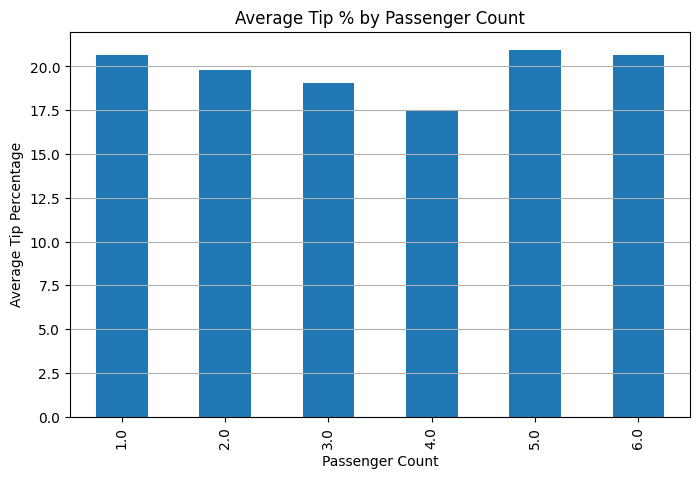

In [80]:
tip_by_passenger = df.groupby('passenger_count')['tip_percent'].mean()

# Plot
tip_by_passenger.plot(kind='bar', figsize=(8,5), title='Average Tip % by Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.xlabel('Passenger Count')
plt.grid(axis='y')
plt.show()

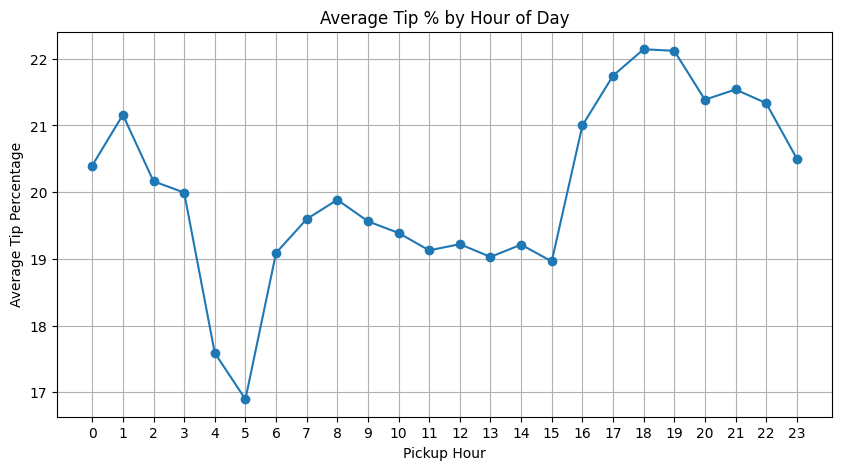

In [81]:
tip_by_hour = df.groupby('pickup_hour')['tip_percent'].mean()

# Plot
tip_by_hour.plot(kind='line', marker='o', figsize=(10,5), title='Average Tip % by Hour of Day')
plt.ylabel('Average Tip Percentage')
plt.xlabel('Pickup Hour')
plt.grid()
plt.xticks(range(0, 24))
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [82]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_df = df[df['tip_percent'] < 10]
high_tip_df = df[df['tip_percent'] > 25]

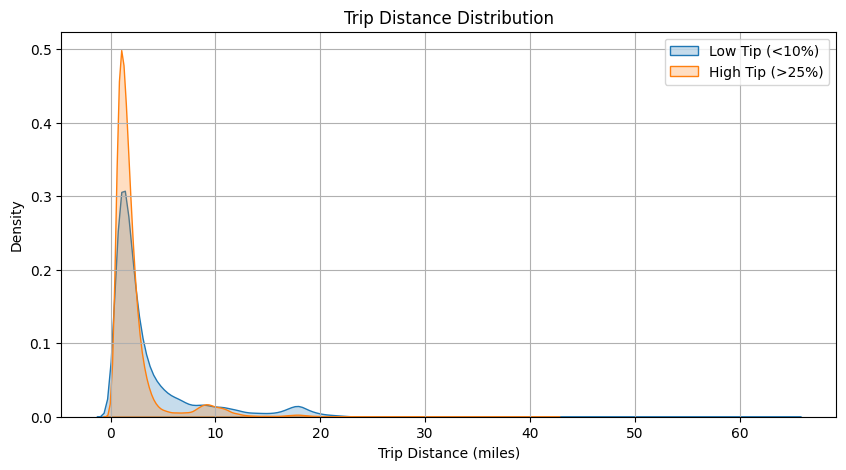

In [83]:
# Compare Trip Distance Distributions (Additional)

plt.figure(figsize=(10,5))
sns.kdeplot(low_tip_df['trip_distance'], label='Low Tip (<10%)', fill=True)
sns.kdeplot(high_tip_df['trip_distance'], label='High Tip (>25%)', fill=True)
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance (miles)')
plt.legend()
plt.grid()
plt.show()

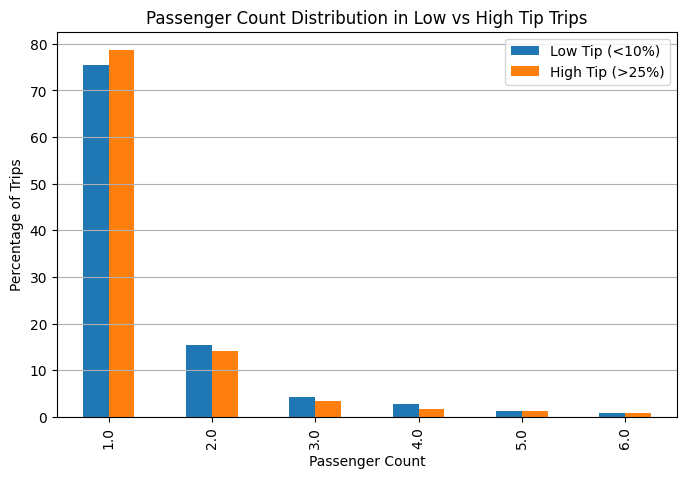

In [84]:
# Compare Passenger Counts (Additional)

fig, ax = plt.subplots(1, 1, figsize=(8,5))
low_counts = low_tip_df['passenger_count'].value_counts(normalize=True).sort_index() * 100
high_counts = high_tip_df['passenger_count'].value_counts(normalize=True).sort_index() * 100

pd.DataFrame({
    'Low Tip (<10%)': low_counts,
    'High Tip (>25%)': high_counts
}).plot(kind='bar', ax=ax)
plt.title('Passenger Count Distribution in Low vs High Tip Trips')
plt.ylabel('Percentage of Trips')
plt.xlabel('Passenger Count')
plt.grid(axis='y')
plt.show()


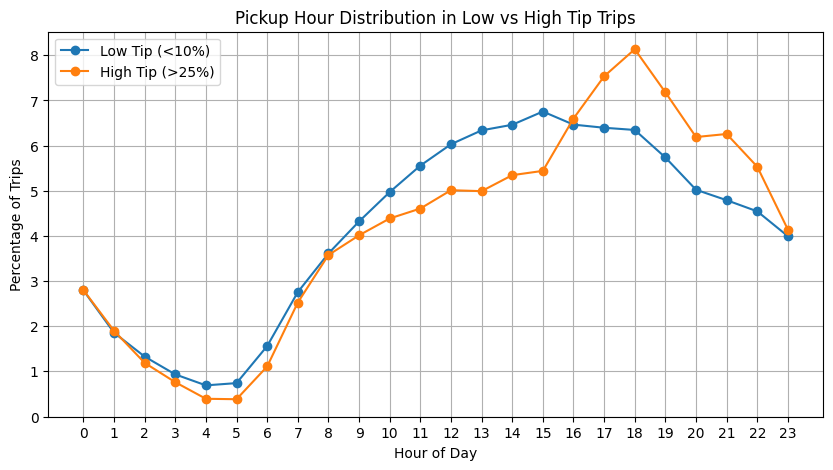

In [85]:
# Compare Pickup Hours (Additional)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
low_hours = low_tip_df['pickup_hour'].value_counts(normalize=True).sort_index() * 100
high_hours = high_tip_df['pickup_hour'].value_counts(normalize=True).sort_index() * 100

pd.DataFrame({
    'Low Tip (<10%)': low_hours,
    'High Tip (>25%)': high_hours
}).plot(kind='line', marker='o', ax=ax)
plt.title('Pickup Hour Distribution in Low vs High Tip Trips')
plt.ylabel('Percentage of Trips')
plt.xlabel('Hour of Day')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


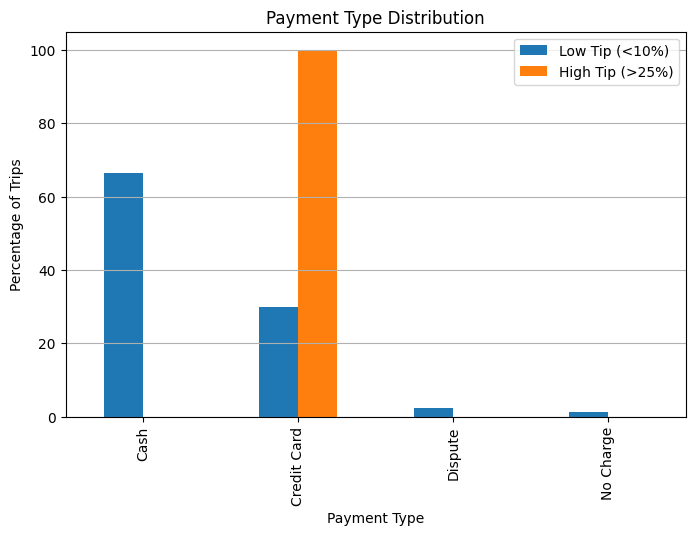

In [86]:
# Compare Payment Types (Additional)

low_pay = low_tip_df['payment_label'].value_counts(normalize=True) * 100
high_pay = high_tip_df['payment_label'].value_counts(normalize=True) * 100

pd.DataFrame({
    'Low Tip (<10%)': low_pay,
    'High Tip (>25%)': high_pay
}).plot(kind='bar', figsize=(8,5))
plt.title('Payment Type Distribution')
plt.ylabel('Percentage of Trips')
plt.xlabel('Payment Type')
plt.grid(axis='y')
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<Figure size 1200x600 with 0 Axes>

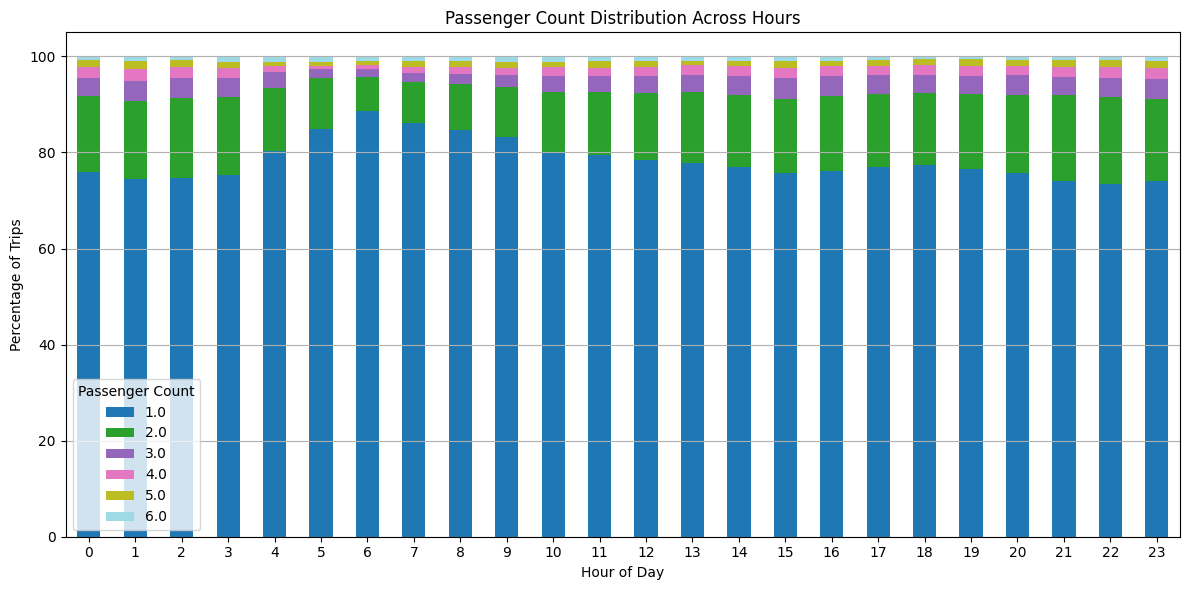

In [87]:
# See how passenger count varies across hours and days

# Analysis for Hours
# Group by pickup_hour and passenger_count
hourly_passenger_dist = df.groupby(['pickup_hour', 'passenger_count']).size().unstack(fill_value=0)

# Normalize to get percentages
hourly_passenger_percent = hourly_passenger_dist.div(hourly_passenger_dist.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12,6))
hourly_passenger_percent.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12,6))
plt.title('Passenger Count Distribution Across Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Trips')
plt.xticks(rotation=0)
plt.legend(title='Passenger Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

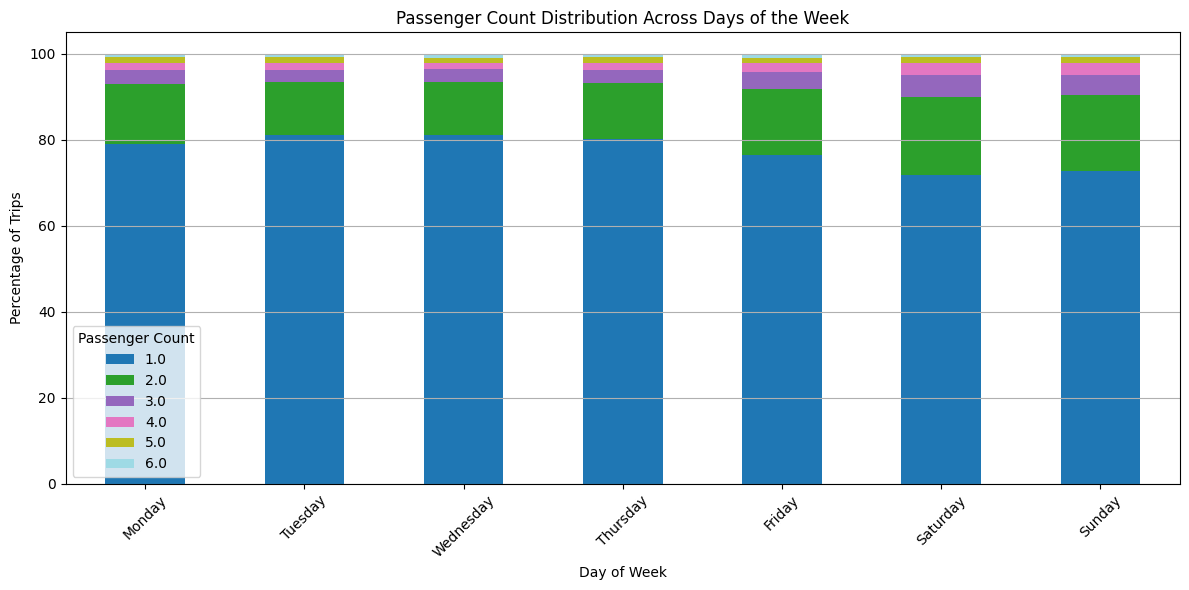

In [88]:
# Analysis for Days of the Week

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['day_of_week'].map(day_map)

daily_passenger_dist = df.groupby(['day_of_week', 'passenger_count']).size().unstack(fill_value=0)
daily_passenger_percent = daily_passenger_dist.div(daily_passenger_dist.sum(axis=1), axis=0) * 100

# Ensure correct order
daily_passenger_percent = daily_passenger_percent.loc[day_order]

# Plot
plt.figure(figsize=(12,6))
daily_passenger_percent.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12,6))
plt.title('Passenger Count Distribution Across Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Trips')
plt.xticks(rotation=45)
plt.legend(title='Passenger Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

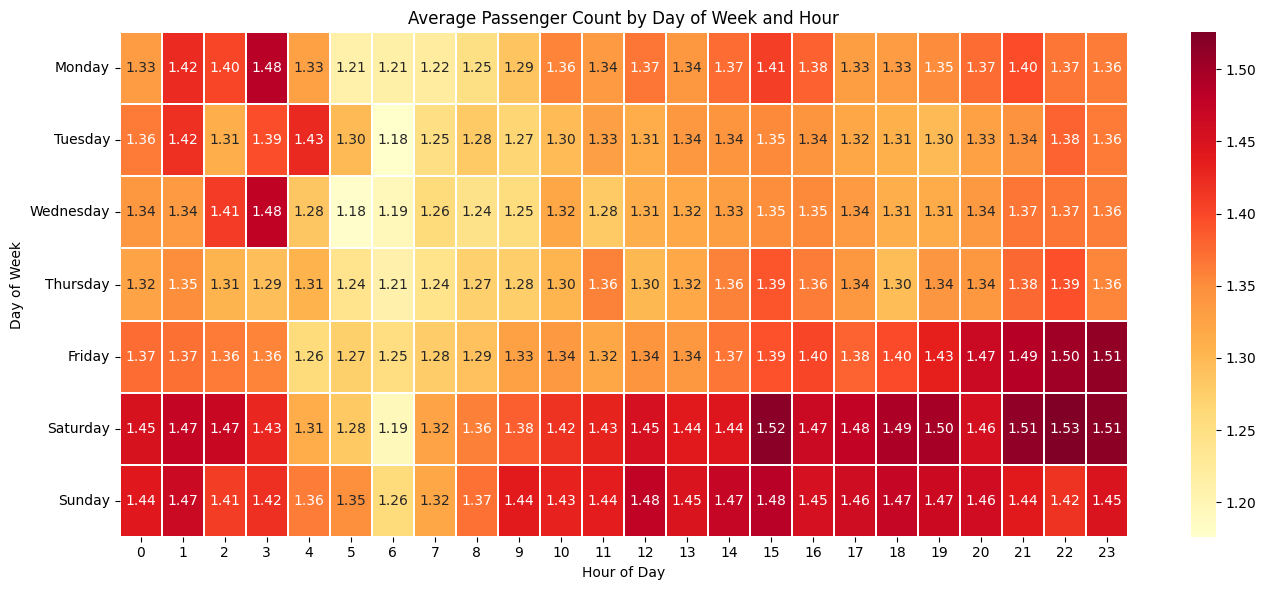

In [89]:
#- combined analysis of varaiation of passanger count across hours and day in heatmap

# Compute average passenger count for each day-hour combination
avg_passenger_heatmap = df.groupby(['day_of_week', 'pickup_hour'])['passenger_count'].mean().unstack()

# Reorder rows to match week order
avg_passenger_heatmap = avg_passenger_heatmap.loc[day_order]

# Plot heatmap with annotations
plt.figure(figsize=(14, 6))
sns.heatmap(avg_passenger_heatmap, cmap='YlOrRd', linewidths=0.3, annot=True, fmt=".2f")
plt.title('Average Passenger Count by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

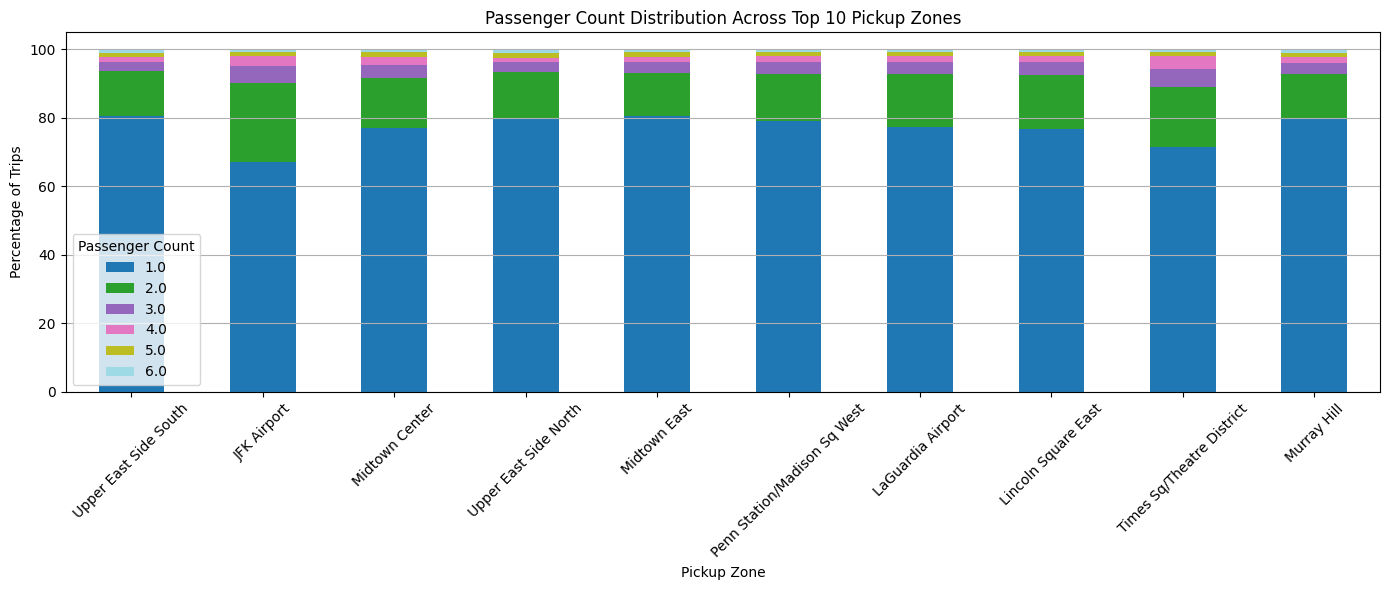

In [90]:
# How does passenger count vary across zones

zone_passenger_counts = df.groupby(['pickup_zone', 'passenger_count']).size().unstack(fill_value=0)

zone_passenger_percent = zone_passenger_counts.div(zone_passenger_counts.sum(axis=1), axis=0) * 100

# Get top 10 zones by total pickups
top_zones = df['pickup_zone'].value_counts().head(10).index
top_zone_data = zone_passenger_percent.loc[top_zones]

# Plot
top_zone_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 6))
plt.title('Passenger Count Distribution Across Top 10 Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Percentage of Trips')
plt.legend(title='Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


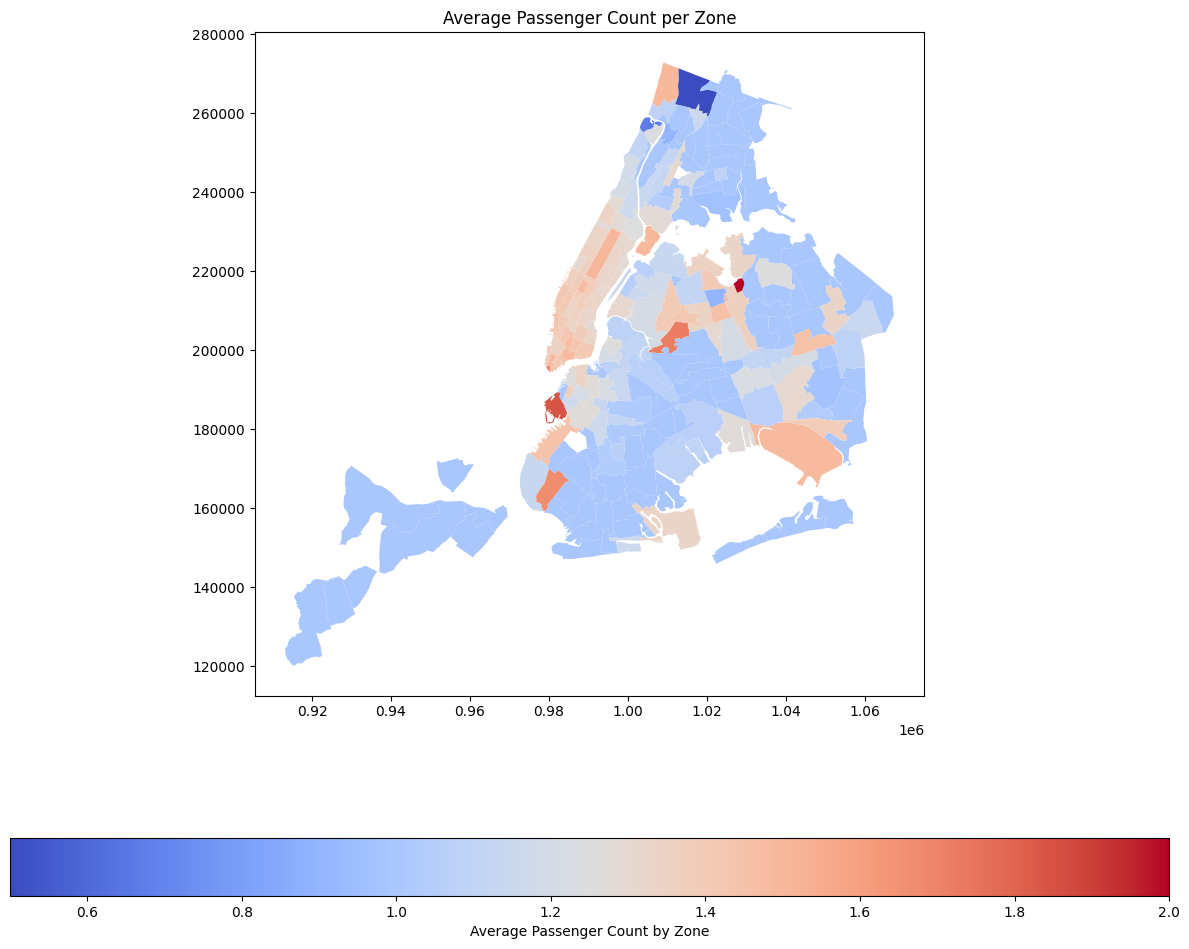

In [91]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Merge the zones_with_counts GeoDataFrame with the main DataFrame on the LocationID and PULocationID
zones_with_counts['total_passenger_count'] = zones_with_counts['LocationID'].map(
    df.groupby('PULocationID')['passenger_count'].sum()
)

# Create a new column for average passenger count in each zone
zones_with_counts['avg_passenger_count'] = zones_with_counts['total_passenger_count'] / zones_with_counts['trip_count']

# Plot the average passenger count per zone
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_counts.plot(column='avg_passenger_count', ax=ax, legend=True,
                       legend_kwds={'label': "Average Passenger Count by Zone", 'orientation': 'horizontal'},
                       cmap='coolwarm')
plt.title('Average Passenger Count per Zone')
plt.tight_layout()
plt.show()


In [92]:
# Find the zones with the highest and lowest average passenger count
high_passenger_zones = zones_with_counts.nlargest(10, 'avg_passenger_count')
low_passenger_zones = zones_with_counts.nsmallest(10, 'avg_passenger_count')

print("Top 10 Zones with Highest Average Passenger Count:")
print(high_passenger_zones[['zone', 'avg_passenger_count']])

print("Top 10 Zones with Lowest Average Passenger Count:")
print(low_passenger_zones[['zone', 'avg_passenger_count']])


Top 10 Zones with Highest Average Passenger Count:
                                    zone  avg_passenger_count
252                        Willets Point             2.000000
194                             Red Hook             1.846154
156                              Maspeth             1.720000
11                          Battery Park             1.692771
66                         Dyker Heights             1.666667
42                          Central Park             1.502963
193                      Randalls Island             1.500000
199  Riverdale/North Riverdale/Fieldston             1.500000
260                   World Trade Center             1.498681
131                          JFK Airport             1.490061
Top 10 Zones with Lowest Average Passenger Count:
                        zone  avg_passenger_count
239       Van Cortlandt Park             0.500000
127         Inwood Hill Park             0.666667
135      Kingsbridge Heights             0.900000
172             N

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [93]:
# How often is each surcharge applied?

#- Group by pickup zone to calculate the frequency of each surcharge
pickup_zone_surcharges = df.groupby('pickup_zone')[['mta_tax', 'improvement_surcharge', 
                                                   'congestion_surcharge', 'Airport_fee']].sum()
#- Plot the frequency of surcharges in pickup zones
pickup_zone_surcharges.plot(kind='bar', figsize=(35, 8), stacked=True)
plt.title('Frequency of Surcharges by Pickup Zone')
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Occurrences')
plt.legend(title="Surcharges", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [94]:
#- Group by pickup hour and calculate surcharge frequencies
hourly_surcharges = df.groupby('pickup_hour')[['mta_tax', 'improvement_surcharge', 
                                               'congestion_surcharge', 'Airport_fee']].sum()

#- Plot the frequency of surcharges by pickup hour
hourly_surcharges.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Frequency of Surcharges by Hour of Pickup')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Occurrences')
plt.legend(title="Surcharges", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


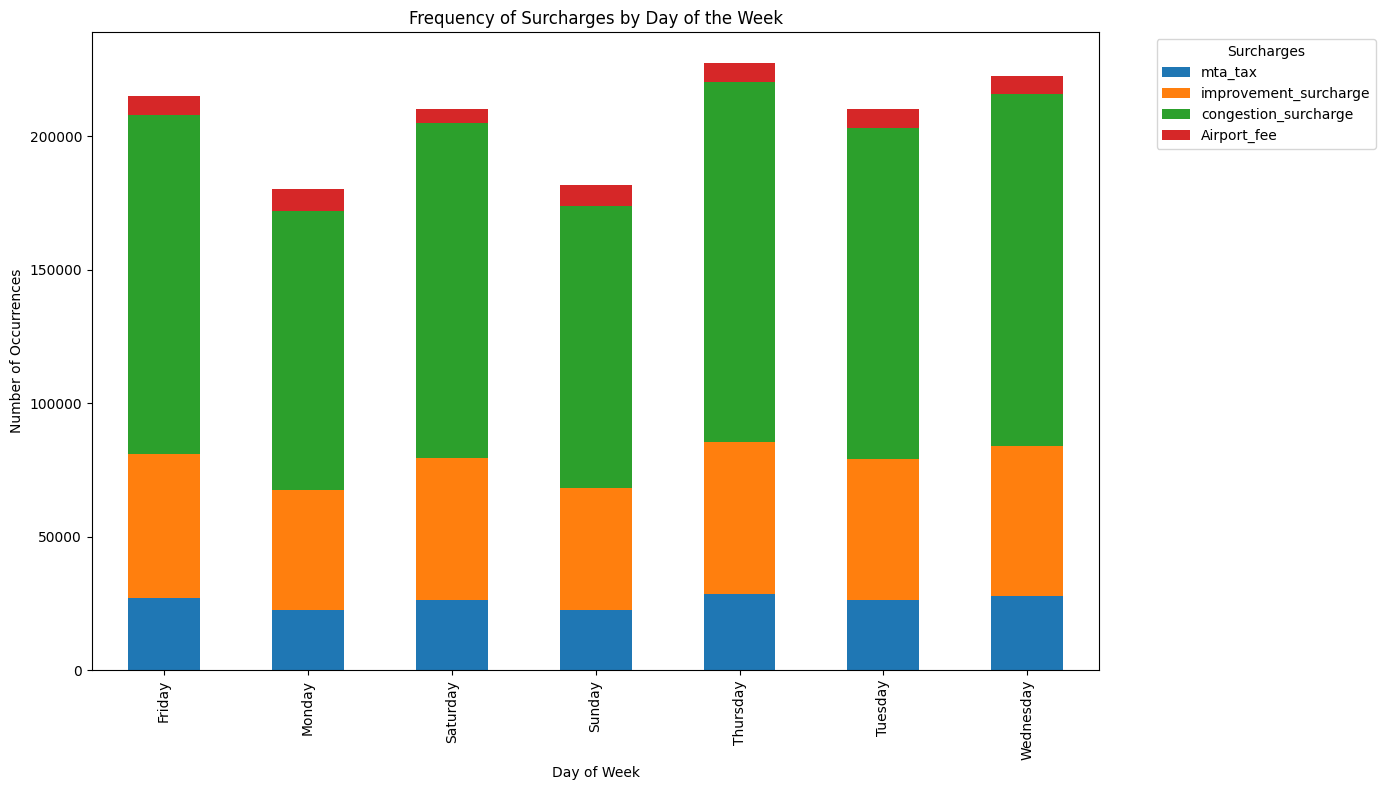

In [95]:
#- Group by day of the week and calculate surcharge frequencies
daily_surcharges = df.groupby('day_of_week')[['mta_tax', 'improvement_surcharge', 
                                              'congestion_surcharge', 'Airport_fee']].sum()

#- Plot the frequency of surcharges by day of the week
daily_surcharges.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Frequency of Surcharges by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Occurrences')
plt.legend(title="Surcharges", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Routing and Dispatch Optimization

**Our analysis revealed that:**

- **Morning demand peaks** between **7 AM–9 AM**, and **evening peaks** between **5 PM–8 PM**, with the highest concentration of pickups in **business and transit-heavy areas** such as **Midtown Manhattan** and **JFK Airport**.
- **Average trip speeds** drop significantly in certain **zone-to-zone routes** during peak hours.  
  For example:  
  Trips from **Zone 132 to Zone 236** at **8 AM** average just **4.0 mph**, indicating heavy congestion and possible route inefficiencies.
- **Idle Time**: Some zones show consistently **low trip frequencies** during specific hours, indicating **underutilized resources**.
- Some outliers in the data showed **trip speeds exceeding 100 mph**, which were identified and removed as **likely timestamp anomalies**.

**Recommendation:**

- **Implement time-aware routing**: Use historical traffic and trip duration data to recommend the most efficient routes between zones depending on the time of day.
- **Dynamic dispatching**: Allocate drivers to **high-yield routes** (e.g., JFK–Manhattan) during peak hours and steer them away from **known congestion zones**.
- **Stagger driver shifts**: Anticipate spikes in demand (e.g., rush hours) and ensure higher cab availability, potentially using **predictive models**.
- **Integrate real-time traffic and trip data** into dispatch systems for **adaptive, smart routing**.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Strategic Cab Positioning Based on Zone-Time Patterns

**By combining hourly, daily, and zone-level pickup patterns, we observed:**

- **Weekday rush hours** see demand concentrated in **commercial hubs**, while **weekend evenings** shift demand toward **nightlife-heavy zones** such as **East Village** and **Williamsburg**.
- Our **heatmap analysis** showed that **Monday to Friday mornings** in **residential zones** had consistently higher **average passenger counts**, while **weekend nights** reflected more **group travel activity**.
- **Zone Imbalances**: Some zones show high drop-off but low pickup volumes (e.g., **upper residential zones**), highlighting **poor cab repositioning**.
- **Passenger count trends** suggest a need for **larger-capacity vehicles** (e.g., **minivans**) in **airport** and **nightlife zones**, where **group travel is more common**.

**Recommendation:**

- **Develop a zone-time positioning grid**: Place more taxis in **nightlife areas post 8 PM on weekends** and in **commercial hubs during weekday mornings**.
- **Encourage repositioning after drop-offs**: Use **incentives** to encourage drivers to move toward **high-pickup zones** rather than waiting in low-demand areas.
- **Deploy larger-capacity vehicles** in zones with **higher passenger counts** such as **airport terminals** and **nightlife hotspots**.
- **Display real-time and forecasted heatmaps** in driver apps to guide **smart positioning decisions**.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Fare Strategy and Revenue Optimization

**Fare and tip-related findings from our data include:**

- **Short trips (≤2 miles)** had the **highest fare per mile**, often exceeding **$5/mile**, while **longer trips** showed significantly **lower unit costs**.
- **Tip percentages** peaked (avg. ~18%) during **mid-range trips** and **weekday evenings**, and were **lower for solo passengers** and **very short distances**.
- **Outliers** like **$300+ fare on sub-0.1 mile trips** were identified and removed as anomalies.
- **Payment type 0 (undefined)** was resolved using **tip amount logic**—records with tips were reclassified as **credit card payments**.

**Recommendation:**

- **Adopt a tiered fare model**: Provide **incentives for mid-range rides** while maintaining profitability on shorter ones.
- **Introduce tip-based loyalty rewards** or **informative tipping prompts** during card payments—similar to dynamic tipping features in platforms like Uber.
- **Use time-based pricing strategies**: Offer **off-peak discounts** to increase traffic during **low-demand hours**.
